Проект **"Составление характерных портретов клиентов банка "Метанпромбанк""**

<h1>Содержание:<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Введение" data-toc-modified-id="Введение-1">Введение</a></span></li><li><span><a href="#1.-Загрузка-данных-и-предобработка" data-toc-modified-id="1.-Загрузка-данных-и-предобработка-2">1. Загрузка данных и предобработка</a></span></li><li><span><a href="#2.-Исследовательский-анализ-данных" data-toc-modified-id="2.-Исследовательский-анализ-данных-3">2. Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#2.1-Анализ-средних-значений" data-toc-modified-id="2.1-Анализ-средних-значений-3.1">2.1 Анализ средних значений</a></span></li><li><span><a href="#2.2-Анализ-гистограмм-распределения-значений" data-toc-modified-id="2.2-Анализ-гистограмм-распределения-значений-3.2">2.2 Анализ гистограмм распределения значений</a></span></li><li><span><a href="#2.3-Анализ-выбросов" data-toc-modified-id="2.3-Анализ-выбросов-3.3">2.3 Анализ выбросов</a></span></li><li><span><a href="#2.4-Анализ-диаграмм-взаимного-распределения-значений" data-toc-modified-id="2.4-Анализ-диаграмм-взаимного-распределения-значений-3.4">2.4 Анализ диаграмм взаимного распределения значений</a></span></li><li><span><a href="#2.5-Категоризация-данных-по-возрасту-клиентов" data-toc-modified-id="2.5-Категоризация-данных-по-возрасту-клиентов-3.5">2.5 Категоризация данных по возрасту клиентов</a></span></li><li><span><a href="#2.6-Анализ-поведения-клиентов-в-разных-городах" data-toc-modified-id="2.6-Анализ-поведения-клиентов-в-разных-городах-3.6">2.6 Анализ поведения клиентов в разных городах</a></span></li><li><span><a href="#2.7-Анализ-по-количеству-используемых-продуктов" data-toc-modified-id="2.7-Анализ-по-количеству-используемых-продуктов-3.7">2.7 Анализ по количеству используемых продуктов</a></span></li></ul></li><li><span><a href="#3.-Проверка-гипотез" data-toc-modified-id="3.-Проверка-гипотез-4">3. Проверка гипотез</a></span><ul class="toc-item"><li><span><a href="#3.1-Гипотеза-№1" data-toc-modified-id="3.1-Гипотеза-№1-4.1">3.1 Гипотеза №1</a></span></li><li><span><a href="#3.2-Гипотеза-№2" data-toc-modified-id="3.2-Гипотеза-№2-4.2">3.2 Гипотеза №2</a></span></li><li><span><a href="#3.3-Гипотеза-№3" data-toc-modified-id="3.3-Гипотеза-№3-4.3">3.3 Гипотеза №3</a></span></li></ul></li><li><span><a href="#Общие-выводы" data-toc-modified-id="Общие-выводы-5">Общие выводы</a></span></li></ul></div>

# Введение

В поседнее время в "Метанпромбанке" выявилась тенденция к уходу клиентов. Для того чтобы разобраться в ситуации, понять причины и выработать решения для улучшения ситуации нами будет проведены анализа поведения клиентов банка, сегментация клиентов и составление характерных портретов клиентов.

**Цели:** сегментировать клиентов банка по характерному поведению, найти решения для улучшения удержания клиентов.

При анализе мы будем работать с предоставленным датасетом с данным о клиентах.

На основании провденного мы составим характерные портреты клиентов по сегментами и отметим положительные и отрицательные показатели. Также мы попробуем дать рекомендации по дальнейшим направлениям для улучшения ситуации с удержанием клиентов банка.

**Презентация** https://disk.yandex.ru/i/3Egl1Tz_HEHiJg

**Дашбоард** https://public.tableau.com/app/profile/vladimir4156/viz/_16586522697830/Dashboard1?publish=yes

Первым делом подгрузим библиотеки, которые могут нам пригодиться для анализа.

In [7]:
import pandas as pd
import numpy as np
from numpy import median
from scipy import stats as st
import math as mth
import datetime as dt
from datetime import datetime, timedelta
#import plotly.express as px 
#from plotly import graph_objects as go
#import re

import matplotlib.pyplot as plt
import seaborn as sns

%config InlineBackend.figure_format='retina'
%matplotlib inline

from pandas.plotting import register_matplotlib_converters
import warnings
warnings.filterwarnings('ignore')
register_matplotlib_converters()

pd.options.display.max_colwidth = 600

# 1. Загрузка данных и предобработка

Загружаем данные.

In [8]:
try:
    df = pd.read_csv('bank_dataset.csv')
except:
    df = pd.read_csv('/datasets/bank_dataset.csv')
    
df.head()

userid  score       City Gender  Age  Objects    Balance  Products  \
0  15677338    619  Ярославль      Ж   42        2        NaN         1   
1  15690047    608    Рыбинск      Ж   41        1   83807.86         1   
2  15662040    502  Ярославль      Ж   42        8  159660.80         3   
3  15744090    699  Ярославль      Ж   39        1        NaN         2   
4  15780624    850    Рыбинск      Ж   43        2  125510.82         1   

   CreditCard  Loyalty  estimated_salary  Churn  
0           1        1         101348.88      1  
1           0        1         112542.58      0  
2           1        0         113931.57      1  
3           0        0          93826.63      0  
4           1        1          79084.10      0

In [9]:
df.shape

(10000, 12)

Данные представлены для 10 000 клиентов банка по параметрам: ID клиента, кредитный рейтинг, пол, город проживания, возраст, баланс на лицевом счете, количество используемых продуктов банка, наличие кредитной карты, активность пользования услуг банка, примерная заработная плата, факт оттока.

Приведем названия колонок к стандартному фиду и посмотрим на общую информацию по данным.

In [10]:
df.columns = df.columns.str.lower().str.replace(' ', '_')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   userid            10000 non-null  int64  
 1   score             10000 non-null  int64  
 2   city              10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   objects           10000 non-null  int64  
 6   balance           6383 non-null   float64
 7   products          10000 non-null  int64  
 8   creditcard        10000 non-null  int64  
 9   loyalty           10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


Мы видим, что данные полные, за исключением параметра "баланс" - здесь множество пропусков (более 36%).

Дополнительно посмотрим на пропучщенные значения.

In [11]:
df.isna().sum()

userid                 0
score                  0
city                   0
gender                 0
age                    0
objects                0
balance             3617
products               0
creditcard             0
loyalty                0
estimated_salary       0
churn                  0
dtype: int64

Пока ничего делать с пропущенными значениями не будем, проанализируем их наличие в дальнейшем. (скорее всего клиенты пользуются услугами банка не открывая лицевой счет либо не имея на нем средств)

Проверим данные на дубликаты.

In [12]:
df.duplicated().sum()

0

Дубликаты отсутствуют!

Посммотрим на количество уникальных значений клиентов банка, чтобы не проверить на наличие неявных дубликатов.

In [13]:
df['userid'].nunique()

10000

Нет дублирующихся клиентов по 'userid'.

Посмотрим на распределение значений по каждому параметру отдельно и проанализируем их полноту и неявные дубликаты.

In [14]:
index = ['gender', 'city', 'objects', 'products', 'creditcard', 'loyalty', 'churn']

for i in index:
    print('Количество значений:', i)
    display(df[i].value_counts())

Количество значений: gender


М    5457
Ж    4543
Name: gender, dtype: int64

Количество значений: city


Ярославль         5014
Ростов Великий    2509
Рыбинск           2477
Name: city, dtype: int64

Количество значений: objects


2     1048
1     1035
7     1028
8     1025
5     1012
3     1009
4      989
9      984
6      967
10     490
0      413
Name: objects, dtype: int64

Количество значений: products


1    5084
2    4590
3     266
4      60
Name: products, dtype: int64

Количество значений: creditcard


1    7055
0    2945
Name: creditcard, dtype: int64

Количество значений: loyalty


1    5151
0    4849
Name: loyalty, dtype: int64

Количество значений: churn


0    7963
1    2037
Name: churn, dtype: int64

Если заменять значения на 0, то меняется поведение клиентов по показателю баланс и появляется статистически значимые различия. Очень маловероятно, что в банке нет информации о наличии у клиента лицевого счета, это скорее всего ошибка при заполнении таблицы. Тем более это касается только клиентов из Ярославля и Рыбинска. В любом случае, если заменить пропуски на 0, то мы получим различия в поведении клиентов и это может объяснить отток клиентов. 

Как мы предположили выше пропуски в значениях баланса лицевого счета скорее всего связаны с отсутствием такового у клиента, поэтому считаем возможным заменить пропущенные значения на "0".

In [15]:
df['balance'] = df['balance'].fillna(0)

In [16]:
df.head()

userid  score       city gender  age  objects    balance  products  \
0  15677338    619  Ярославль      Ж   42        2       0.00         1   
1  15690047    608    Рыбинск      Ж   41        1   83807.86         1   
2  15662040    502  Ярославль      Ж   42        8  159660.80         3   
3  15744090    699  Ярославль      Ж   39        1       0.00         2   
4  15780624    850    Рыбинск      Ж   43        2  125510.82         1   

   creditcard  loyalty  estimated_salary  churn  
0           1        1         101348.88      1  
1           0        1         112542.58      0  
2           1        0         113931.57      1  
3           0        0          93826.63      0  
4           1        1          79084.10      0

Итак мы выяснили, что **у нас отсутвует информация о предлагемых продуктах банка, а также нет данных почему столько пропусков в значениях баланса лицевого счета**. Это в значительной степени может повлиять на результаты исследования и его выводы, а также на точность составленных портретов клиентов.

# 2. Исследовательский анализ данных

Переходим к исследовательскому анализу данных. нашей целью является определение характерных портретов клиентов банка.

## 2.1 Анализ средних значений

Первое, посмотрим на средние значения для клиентов по городам и факту оттока.

In [17]:
table = df.drop('userid', axis=1).groupby(['city', 'churn']).mean()
table

score        age   objects        balance  \
city           churn                                                   
Ростов Великий 0      653.261357  37.311504  5.011799  119427.106696   
               1      647.689189  44.894349  5.006143  120361.075590   
Рыбинск        0      652.104167  37.839147  5.107558   59678.070470   
               1      647.484262  44.147700  4.656174   72513.352446   
Ярославль      0      651.162226  37.235966  5.005471   60339.275678   
               1      641.914815  45.133333  5.000000   71192.795728   

                      products  creditcard   loyalty  estimated_salary  
city           churn                                                    
Ростов Великий 0      1.551032    0.716224  0.561652     102414.657876  
               1      1.454545    0.708845  0.363636      98403.886450  
Рыбинск        0      1.544574    0.699128  0.567345      98602.369864  
               1      1.513317    0.673123  0.341404     103629.554818  
Ярославль      0      1.541389    0.707422  0.545433      99217.097331  
               1      1.476543    0.702469  0.367901     103439.278296

Можно сделать первые выводы:

- уровень кредитного скоринга по городам примерно одинаков, а у клиентов ушедших в отток он ниже;

- возрастное распределение по городам и факту оттока одинаковое;

- количество объектов в собственности примерно равное, за исключением клиентов из Рыбинска ушедших в отток - среднее количество ниже на 0,5 в сравнении с другими группами;

- явные различия наблюдаются в балансе лицевого счета: у клиентов из Ростова Великого средний баланс приблизительно в 2 раза выше, чем у клиентов из других городов, а различие по показателю оттока несущественное, тогда как в Ярославле и Рыбинске различие в уровне баланса больше. Жополнительно отметим, что в отток чаще попадают клиенты с более высоким балансом;

- количество используемых продуктов в среднем по всем группам равное;

- наличие кредитной карты в среднем на одном уровне не зависимо от города и факта оттока;

- активность клиентов по городам примерно равная, как и различие по факту оттока по городам;

- уровень оценочной заработной платы примерно одинаков по городам, но в Ростове Великом он выше для клиентов, которые остаются с банком, а для Ярославля и Рыбинска выше для тех, кто ушел в отток.

## 2.2 Анализ гистограмм распределения значений

Рассмотрим распределение признаков по факту оттока на графиках.

In [18]:
def graf_func(params, col_count, graf):
    params = params
    col_count, row_count = col_count

    plt.figure(figsize=(12, 10))

    for i, param in enumerate(params):
        for churn in df['churn'].unique():
            current = df.query('churn == @churn')
            graf(current[param], kde=True,
                    ax = plt.subplot(row_count, col_count, i + 1))
        plt.title(param)
    plt.tight_layout()    
    return plt.show()

Для признаков кредитного скоринга, возраста, количества объектов, баланса, количества используемых продуктов, оценочной зарплаты построим гистограммы распределения.

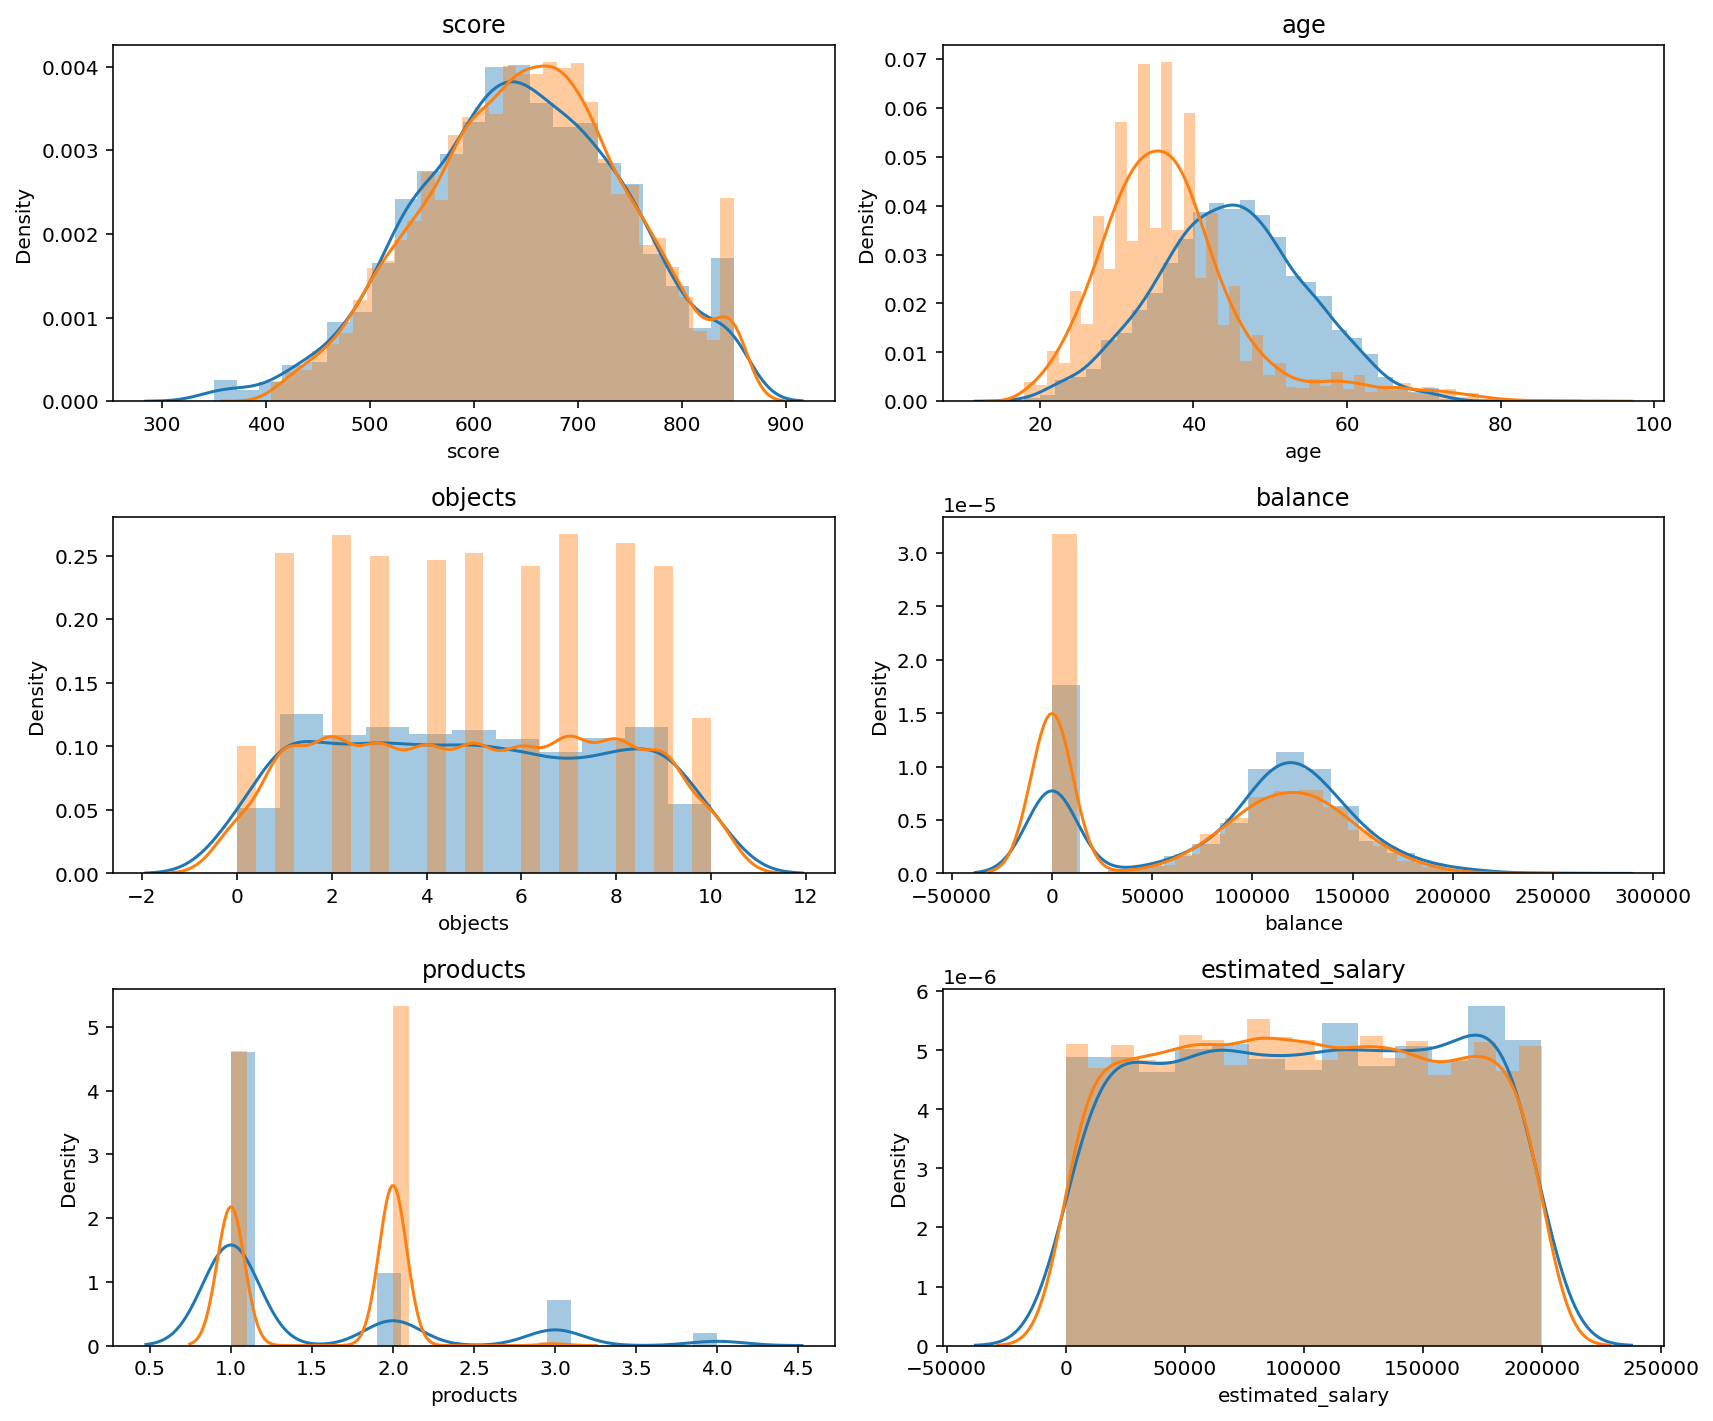

In [19]:
params = ['score', 'age', 'objects',\
          'balance', 'products', 'estimated_salary']
col_count, row_count = 2, 3

plt.figure(figsize=(12, 10))

for i, param in enumerate(params):
    for churn in df['churn'].unique():
        current = df.query('churn == @churn')
        sns.distplot(current[param], kde=True, 
                    ax = plt.subplot(row_count, col_count, i + 1))
    plt.title(param)
plt.tight_layout()    
plt.show()

Мы видим приблизительно одинаковое поведение клиентов по признакам: кредитный скоринг, количество объектов, оценочная зарплата, что может говроить о том, что эти признаки не оказывают существенного влияния на факт оттока клиентов.

Также на лицо явные различия в поведении клиентов по признакам: возраст, количество используемых продуктов и баланс лицевого счета. По этим параметрам проведем подробный обзор.

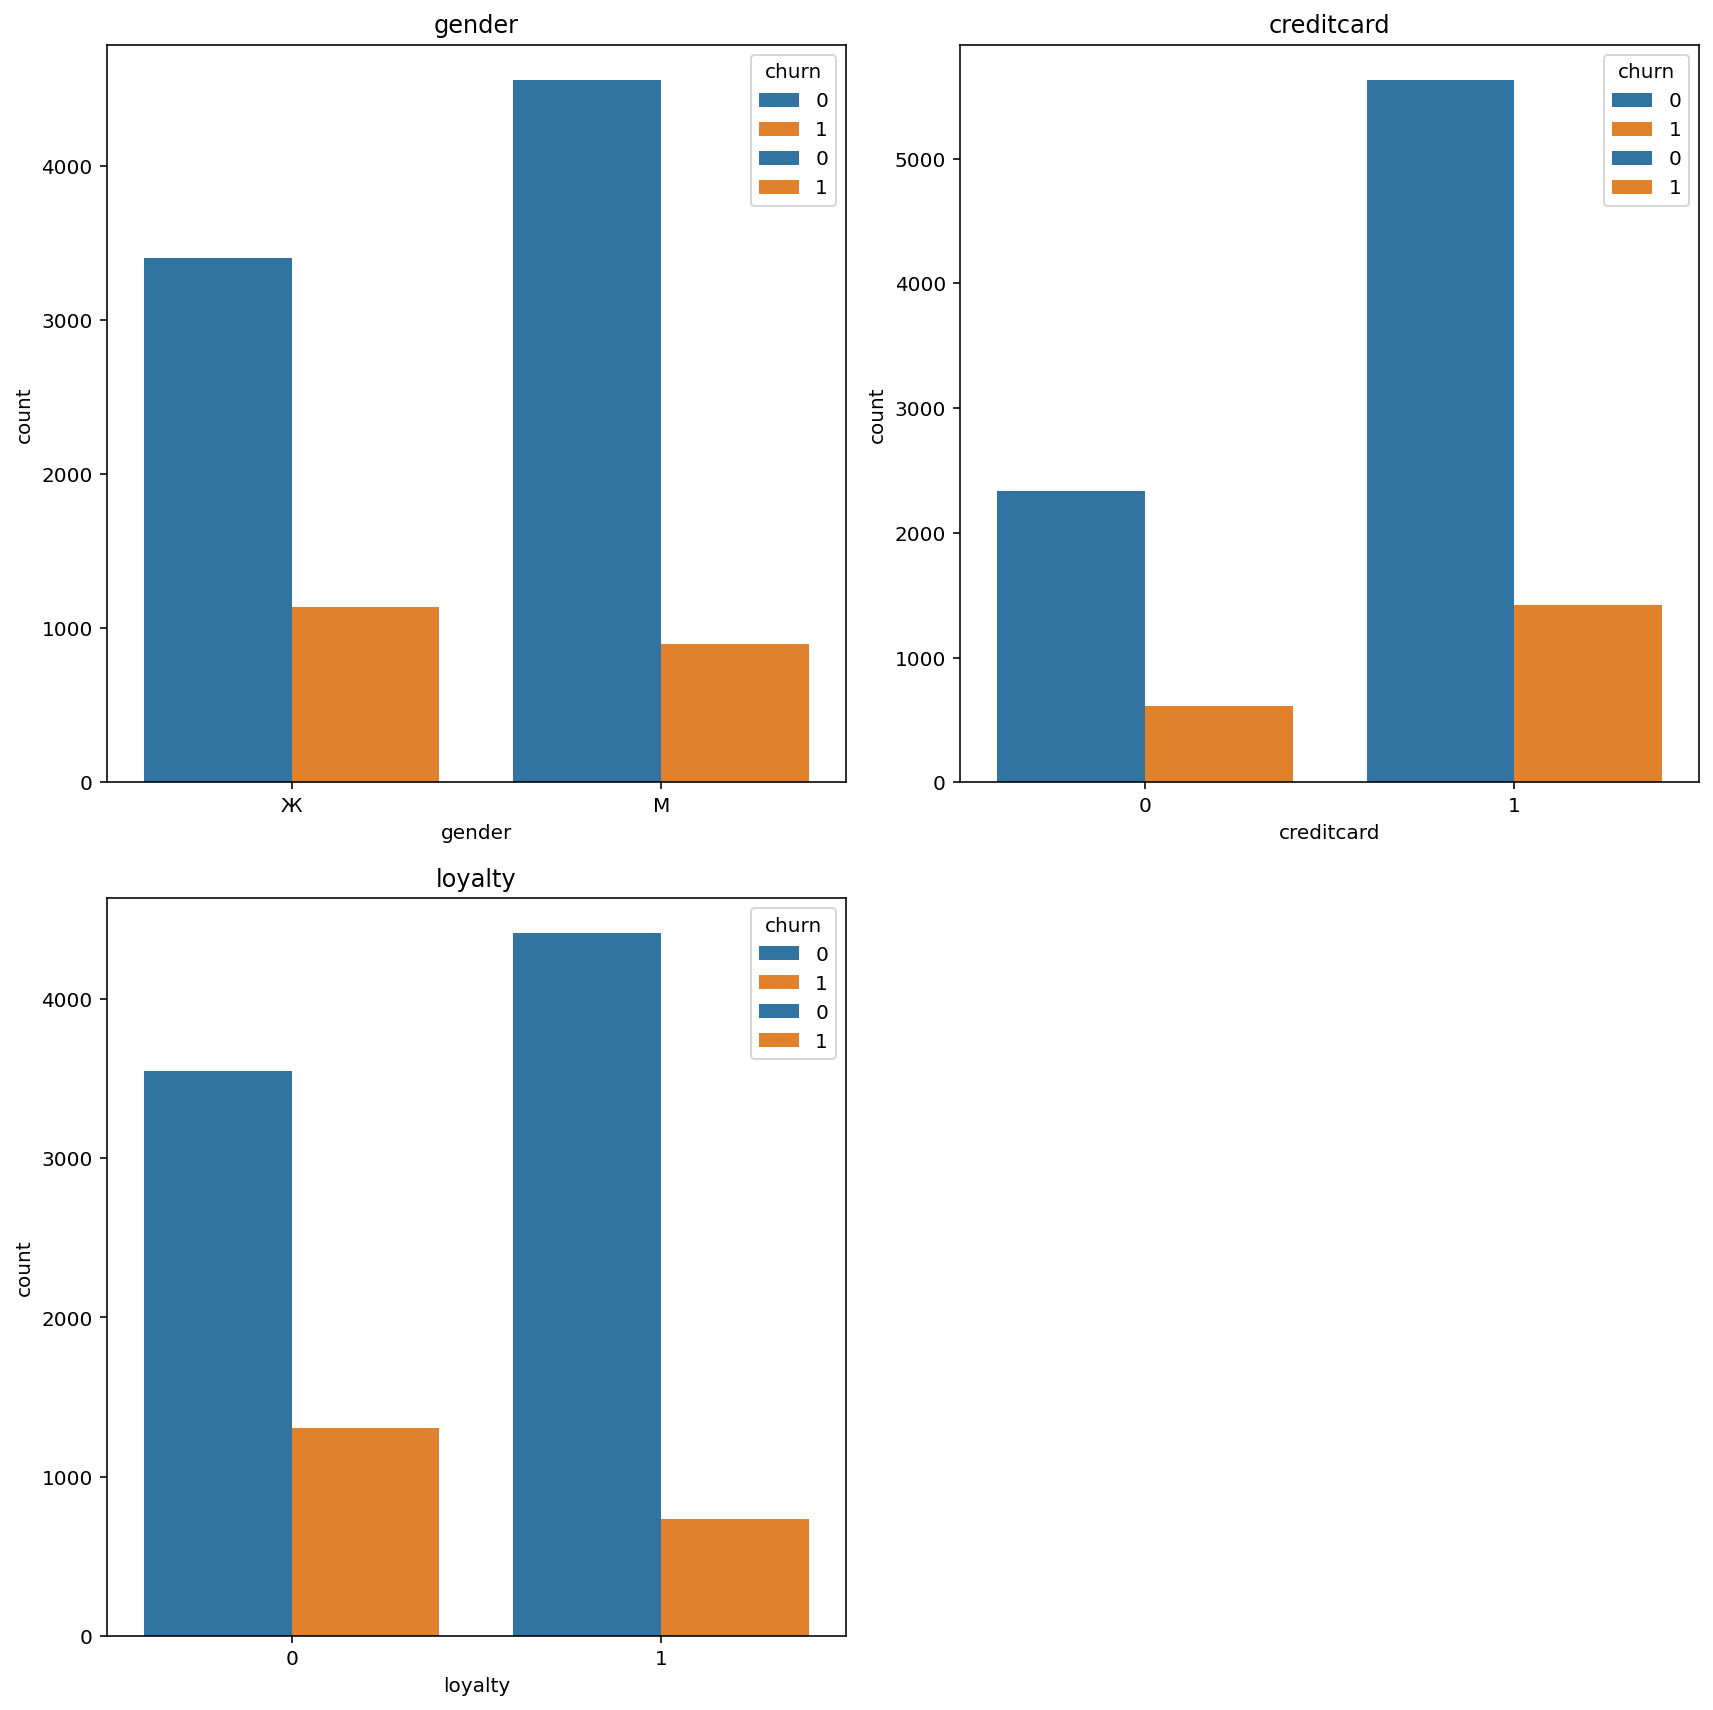

In [20]:
params = ['gender', 'creditcard', 'loyalty']
col_count, row_count = 2, 2

plt.figure(figsize=(12, 12))

for i, param in enumerate(params):
    for churn in df['churn'].unique():
        current = df.query('churn == @churn')
        sns.countplot(current[param], hue=df['churn'],
                    ax = plt.subplot(row_count, col_count, i + 1))
    plt.title(param)
plt.tight_layout()    
plt.show()

Проанализировав распределение признаков по полу, наличию кредитной карты и активности клиентов с разбивкой по факту оттока делаем следующие выводы:

- среди женщин процент ушедших в отток выше, чем среди мужчин;

- по наличию кредитной карты отношение тех кто ушел в отток к тем, кто остался примерно равное;

- среди тех клиентов, кто не проявлял активности факт отток выше, чем среди тех, кто является активным пользователем банковских услуг.

Дополнительно стоит отметить, что мы не располагаем данными как считался показатель Активность, что не позволяет делать однозначных выводов о поведении клиентов.

## 2.3 Анализ выбросов

Проанализируем значения аномальных выбросов для непрерывных величин: кредитного скоринга, возраста, баланса, оценочной зарплаты.

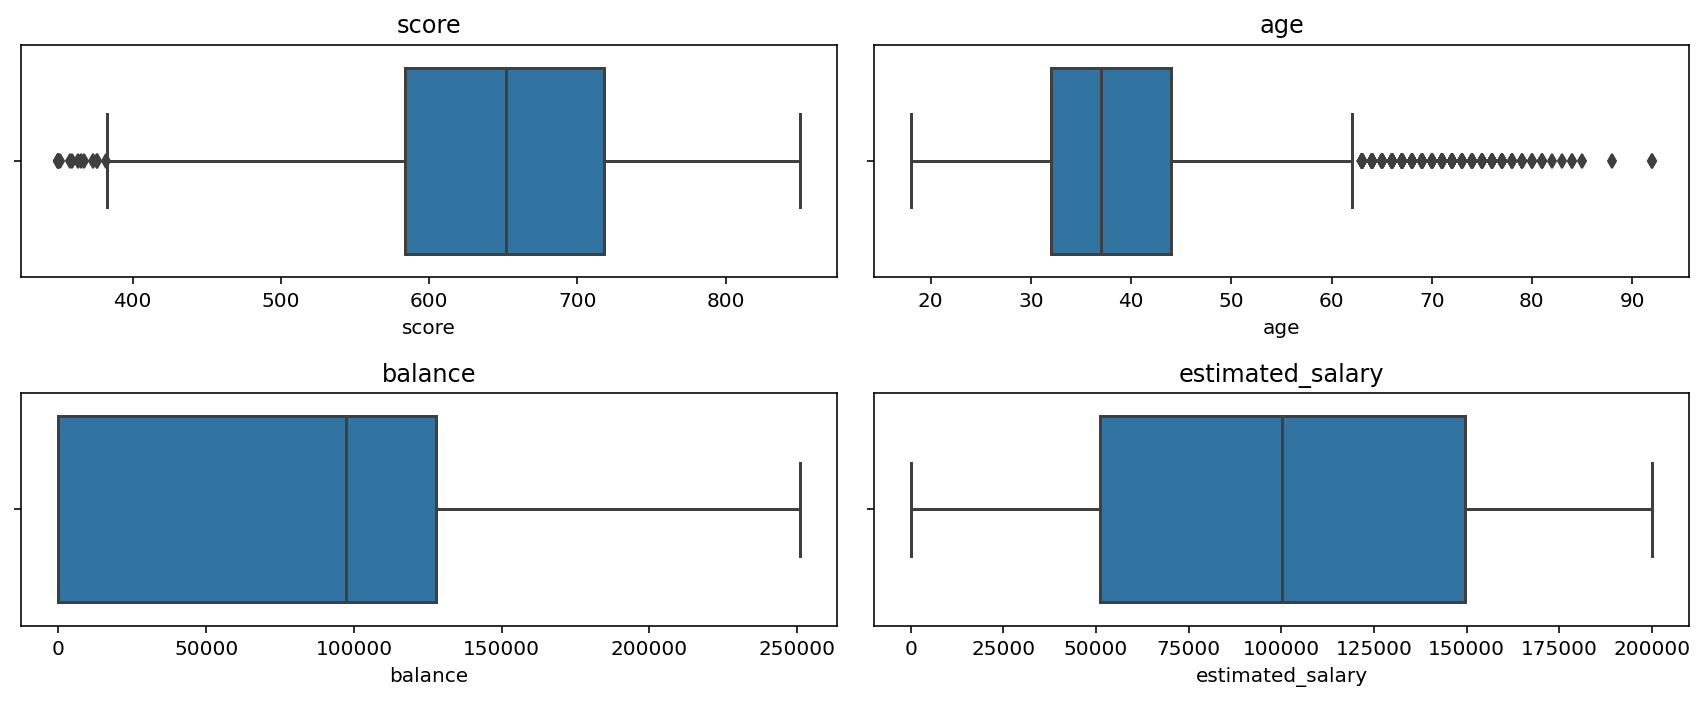

In [21]:
params = ['score', 'age',\
          'balance', 'estimated_salary']
col_count, row_count = 2, 2

plt.figure(figsize=(12, 5))

for i, param in enumerate(params):
    sns.boxplot(x=df[param], data=df,\
                ax = plt.subplot(row_count, col_count, i + 1))
    plt.title(param)
plt.tight_layout()    
plt.show()

Мы видим интресные результаты:

- по уровню баланса лицевого счета основная масса показателей сместиталсь к 0 при среднем значении в 100 000 (что является следствием заменой нами пропущенных значений на 0), явных аномалий нет;

- по уровню зарплаты мы видим симметричное распределение значение со средним на отметке 100 000, выбросы отсутствуют;

- значения по кредитному скорингу имеют среднее значение в 650 ед. и небольшие выбросы в меньшую сторону. Эти выбросы не слишком критичны для нас;

- на возрастном графике мы видим, что средний возраст клиентов примерно равен 37-38 лет, также есть явные выбросы в большую сторону. считаем, что их не стоит убирать, так это пожилые клиенты, которые пользуются услугами нашего банка, а значит можно их рассматривать как отдельных клиентов со своим характерным поведением.

## 2.4 Анализ диаграмм взаимного распределения значений

Проведем анализ диаграммы попарного распределения признаков с группировкой по факту оттока.

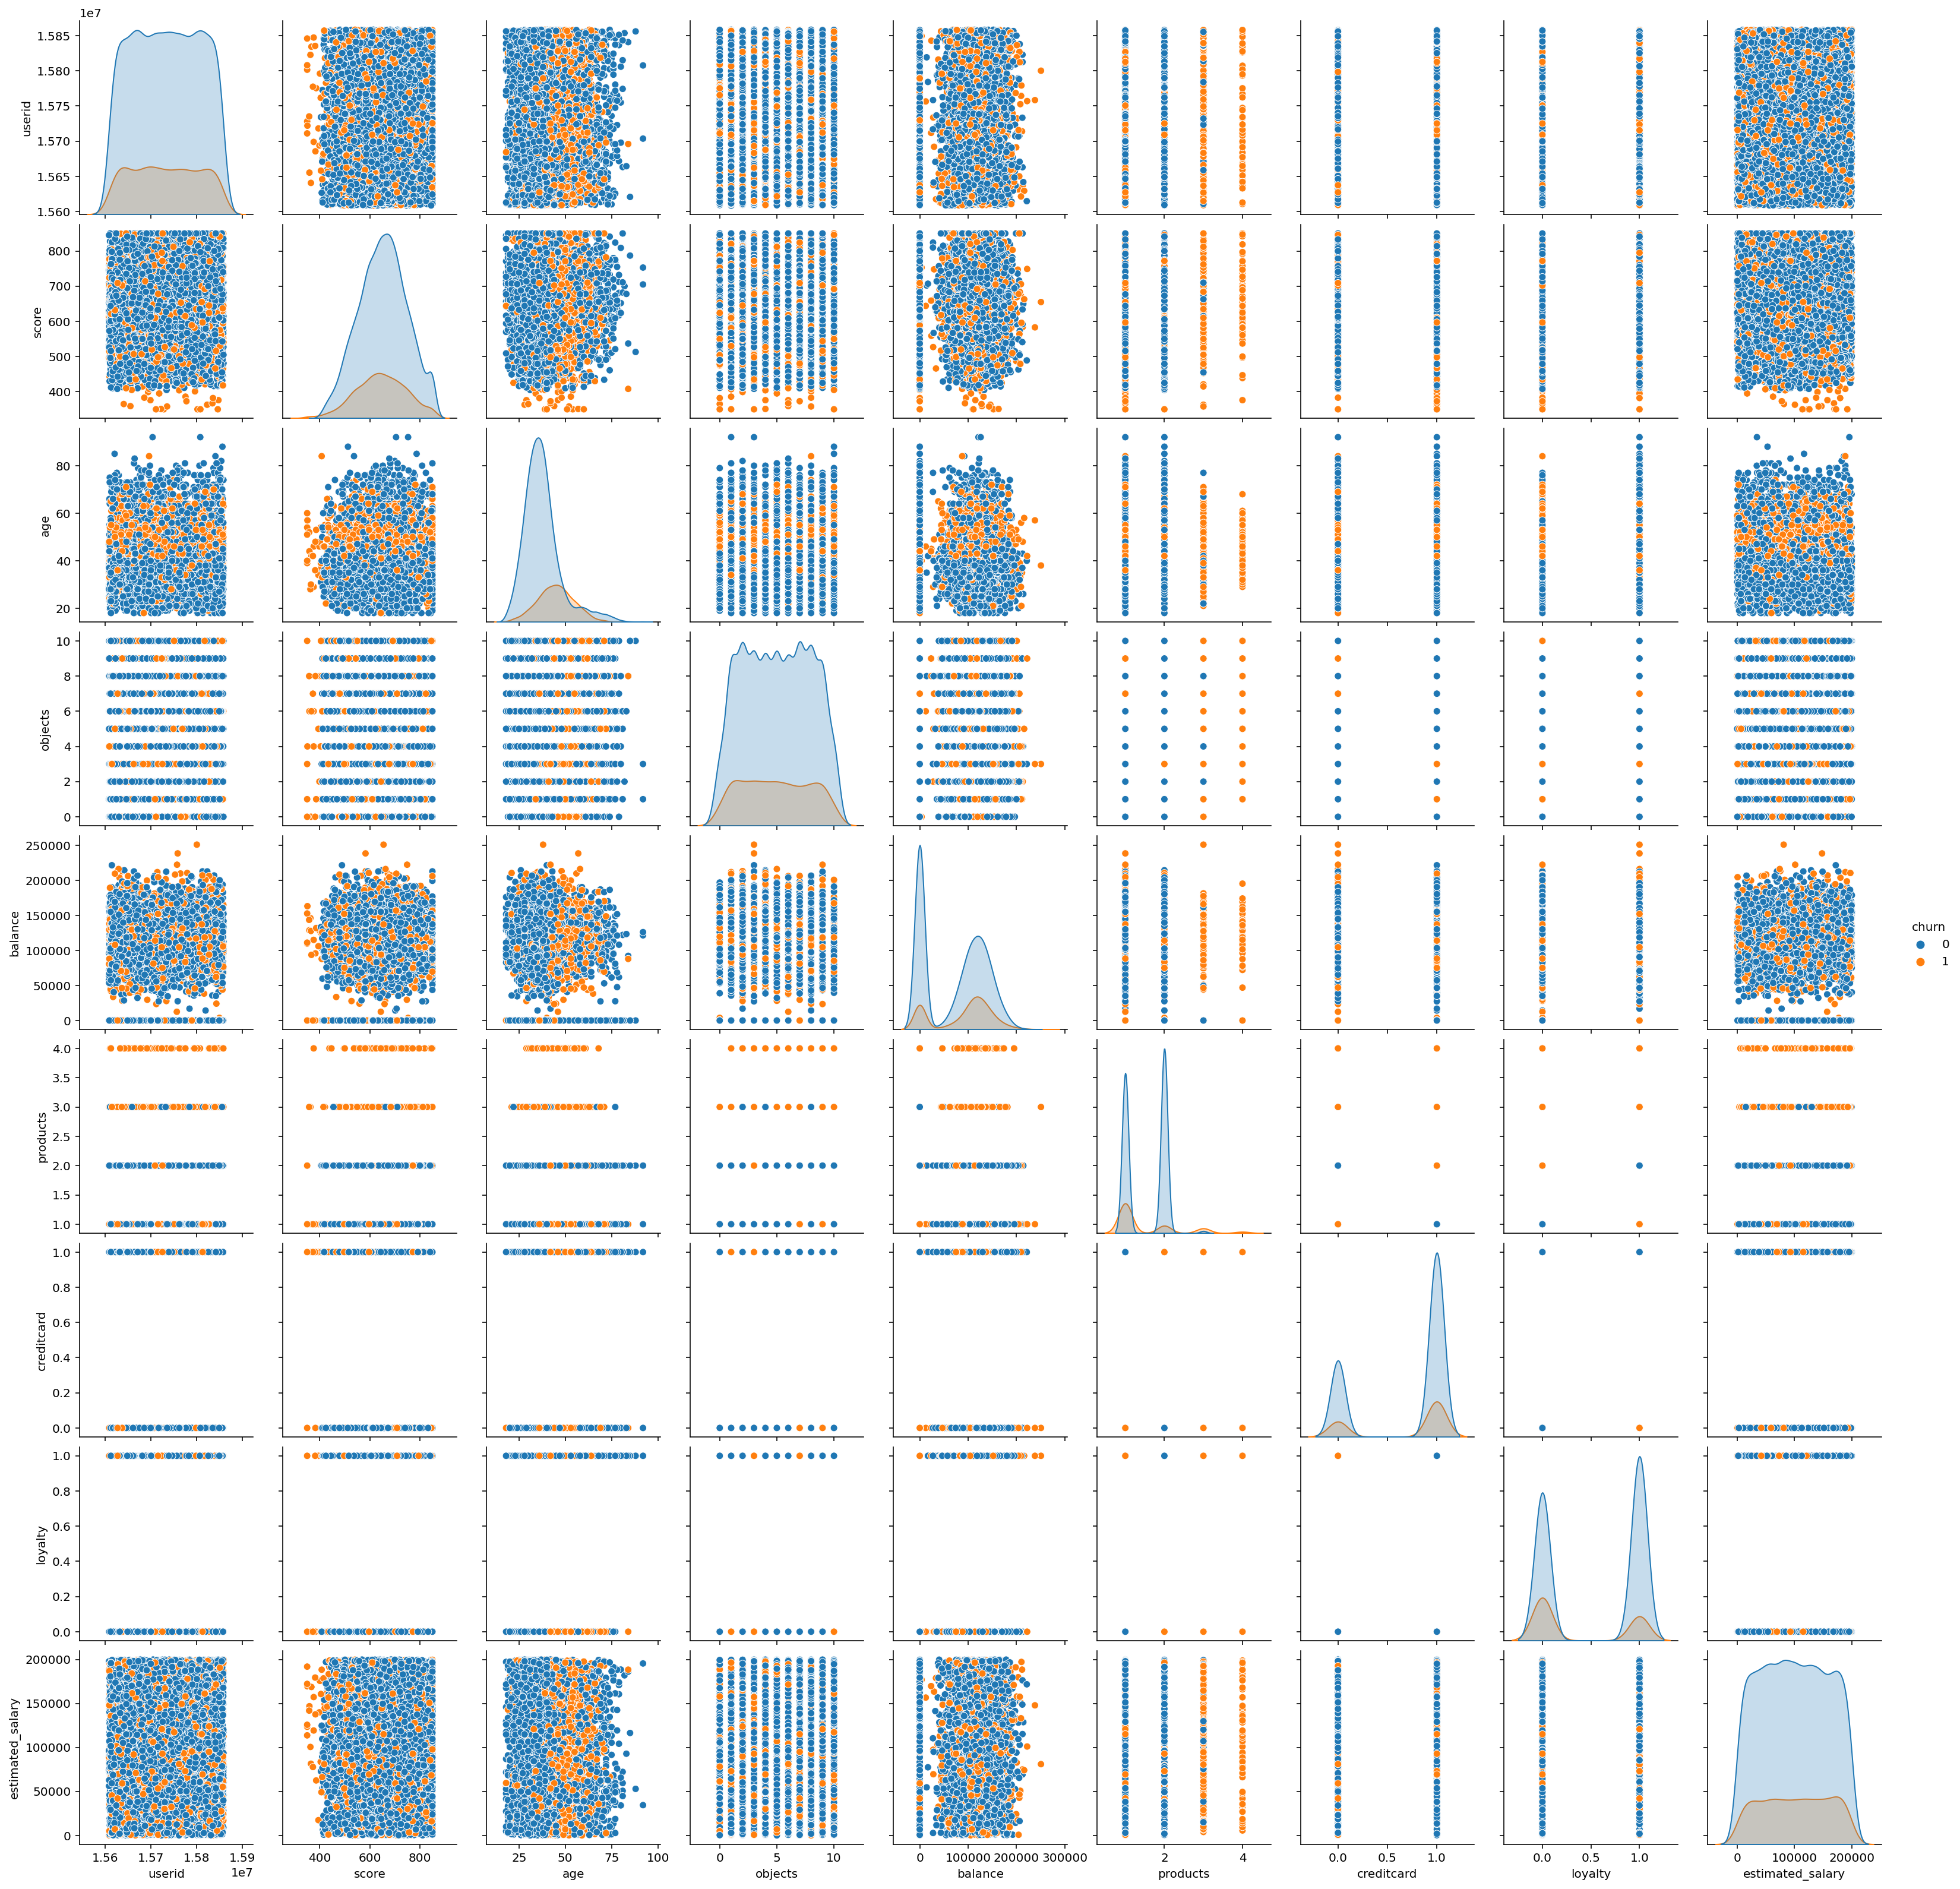

In [22]:
sns.pairplot(df, hue='churn')
plt.show()

Явно бросается в глаза, что чем больше продуктов использует клиент, тем больше вероятность его ухода в отток (это явный признак проверить предлагаемые банком продукты и их качество отдельно. В нашем исследовании отсутствует какая-либо информация о таких продуктах)

Также можно выделить, что средневозрастные клиенты (35-50) лет также демонстрируют явную склонность уходить в отток.

Дополнительно отметим, что клиенты с низким кредитным скорингом практически наверняка попадут в отток.

## 2.5 Категоризация данных по возрасту клиентов

На основании выявленных нами возрастных особенностей поведения клиентов проведем категоризацию клиентов на возрастные группы:

- младше 25 лет;

- от 26 до 35 лет;

- от 36 до 45 лет;

- от 46 до 60 лет;

- старше 60 лет.

In [23]:
#Функция разбивки на возрастные группы
def age_group(age):
    '''оператором сравнения будем проверять значения и выделять каждое в отдельную группу'''
    if age<25:
        return '<25'
    if age<35:
        return '26-35'
    if age<45:
        return '36-45'
    if age<60:
        return '46-60'
    return '>60'

#применим функцию к датафрейму
df['age_group'] = df['age'].apply(age_group)

#Функция создания сводных таблиц
def prcnt_func(index_a, index_b, column_a, column_b, merged, sort):
    '''создадим таблицу из двух сводных таблиц с расчетом процентов от общего числа по различным группам'''
    a = df.pivot_table(index=index_a, values='userid', aggfunc='count').reset_index()
    a.columns = column_a
    a= a.sort_values(by='count', ascending=False)
    b = df.pivot_table(index=index_b, values='userid', aggfunc='count').reset_index()
    b.columns = column_b
    a = a.merge(b, on=merged, how='left')
    a['%'] = (a['count']/a['sum']*100).round()
    return display(a.sort_values(by=sort))

Прменим функцию создания сводных таблиц и создадаим таблицу с разделением клиентов на группы по возрасту и факту оттока, а также отобразим полученные данные на графике.

age_group  churn  count   sum     %
1     26-35      0   2972  3222  92.0
7     26-35      1    250  3222   8.0
0     36-45      0   3278  3981  82.0
4     36-45      1    703  3981  18.0
2     46-60      0    917  1814  51.0
3     46-60      1    897  1814  49.0
5       <25      0    417   457  91.0
9       <25      1     40   457   9.0
6       >60      0    379   526  72.0
8       >60      1    147   526  28.0

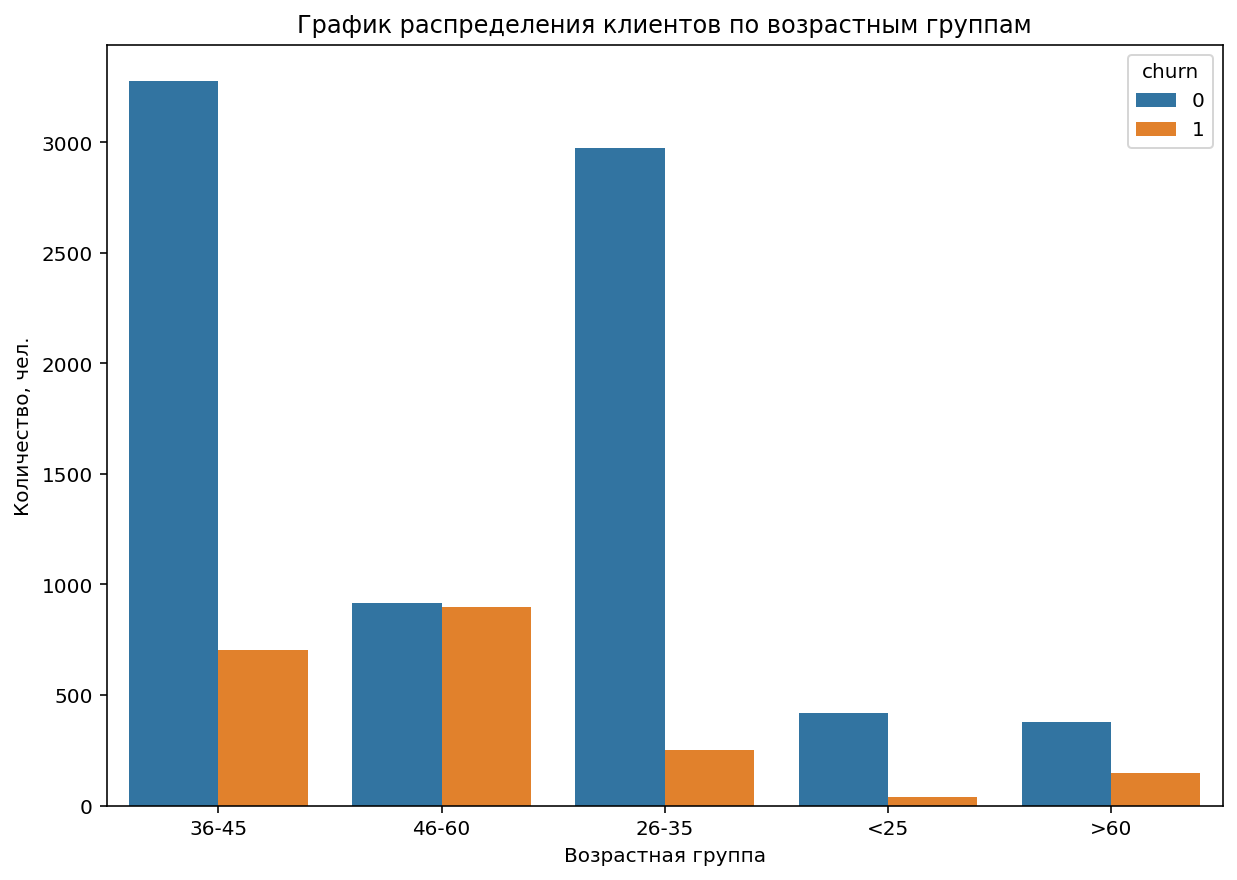

In [24]:
index_a = ['age_group', 'churn']
column_a = ['age_group', 'churn', 'count']
index_b = 'age_group'
column_b = ['age_group', 'sum']
merged = 'age_group'
sort = 'age_group'

#Создадим сводную таблицу
prcnt_func(index_a, index_b, column_a, column_b, merged, sort)

#Отобразим столюбчатую диаграмму распределения по возрастным группам
plt.figure(figsize=(10, 7))
sns.countplot(x='age_group', hue='churn', data=df)
plt.title('График распределения клиентов по возрастным группам')
plt.xlabel('Возрастная группа')
plt.ylabel('Количество, чел.')
plt.show()

Мы видим, что среди клиентов средневозрастных групп (36-45 и 46-60) явно прослеживается тенденция к оттоку (**особенно в группе 46-60 лет - 49%, практически половна клиентов покидают банк**). 

Также отмечаем большой процент оттока у клиентов старше 60 лет, что может быть обусловленно невозможностью пользованием услугами банка по причинам непонимания продуктовой линейки и проблемами со здоровьем.

## 2.6 Анализ поведения клиентов в разных городах

Теперь проведем анализ поведения клиентов в разных городах.

Для начала посмотрим на общие показатели по соотношению оттока клиентов к общему количеству в городах.

city  churn  count   sum     %
2  Ростов Великий      0   1695  2509  68.0
3  Ростов Великий      1    814  2509  32.0
1         Рыбинск      0   2064  2477  83.0
5         Рыбинск      1    413  2477  17.0
0       Ярославль      0   4204  5014  84.0
4       Ярославль      1    810  5014  16.0

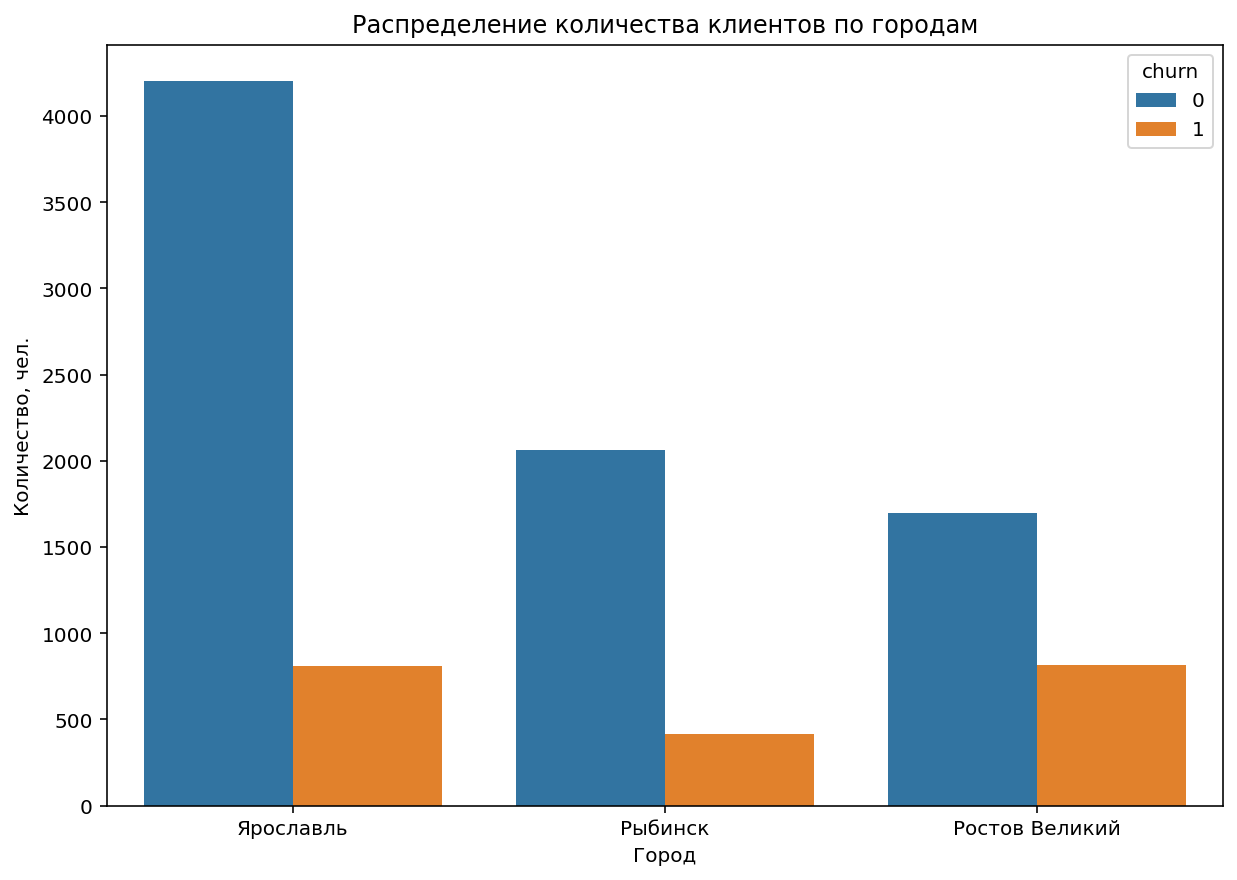

In [25]:
index_a = ['city', 'churn']
column_a = ['city', 'churn', 'count']
index_b = 'city'
column_b = ['city', 'sum']
merged = 'city'
sort = 'city'

#Создадим сводную таблицу
prcnt_func(index_a, index_b, column_a, column_b, merged, sort)

#Отобразим столюбчатую диаграмму распределения по городам
plt.figure(figsize=(10, 7))
sns.countplot(x='city', hue='churn', data=df)
plt.title('Распределение количества клиентов по городам')
plt.xlabel('Город')
plt.ylabel('Количество, чел.')
plt.show()

Здесь мы явно видим, что основные проблемы с удержанием клиентов банка наблюдаются в Ростеве Великом - 32% клиентов уходят в отток. В Ярославле и Рыбинске ситуация лцчше, но ее также необходимо улучшать.

Теперь посмотрим на отдельные параметры по городам.

Посмотрим как себя ведет показатель баланса лицевого счета.

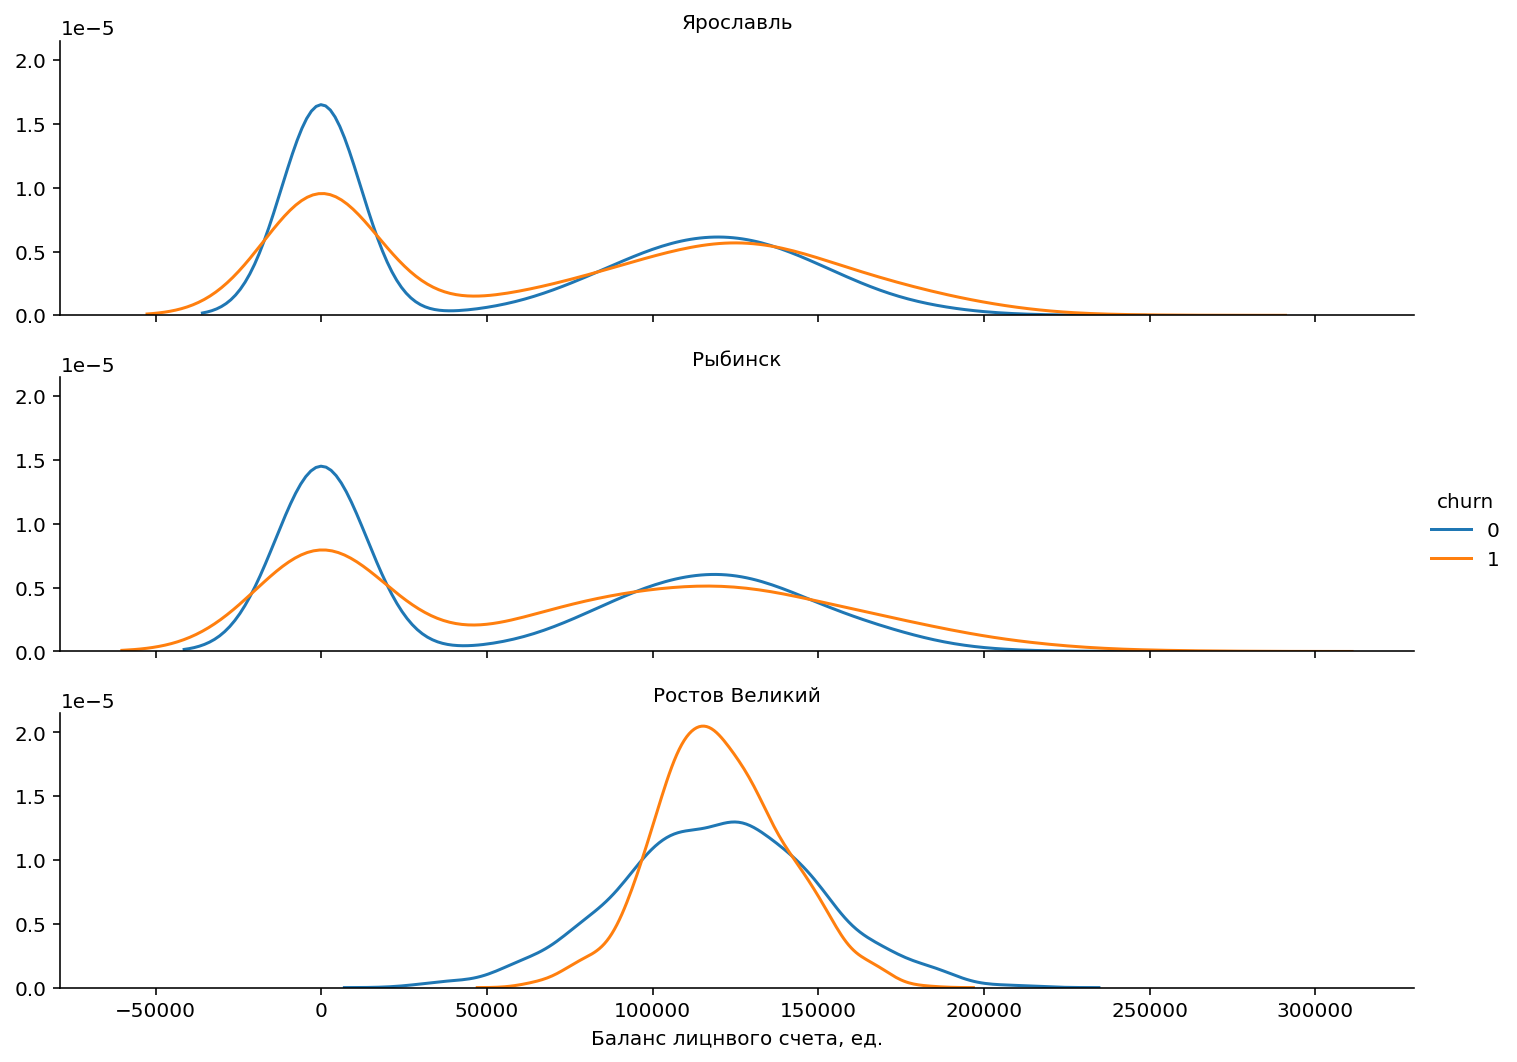

In [26]:
g = sns.FacetGrid(df, row='city', hue='churn',
                  height=2.5, aspect=4)
g.map(sns.kdeplot, 'balance')
g.set_xlabels('Баланс лицнвого счета, ед.')
g.set_titles(row_template='{row_name}')
g.add_legend()

Наблюдается явное отличие в поведении клиентов. В Ярославле и Рыбинске клиенты показывают одинаковое поведение и пользуются услугами банка даже не имея лицевого счета, что может объясняться предлагаемыми услугами (о которых мы к сожалению не знаем). И необходимо отметить, что удержание клиентов с нулевым балансом хорошее.

В Рсотове Великом наоборот - клиентов банка с нулевым балансом лицевого счета нет, а отток клиентов выше. С этим надо отдельно разобраться.

Теперь построим диаграммы распределения оценочной зарплаты по городам.

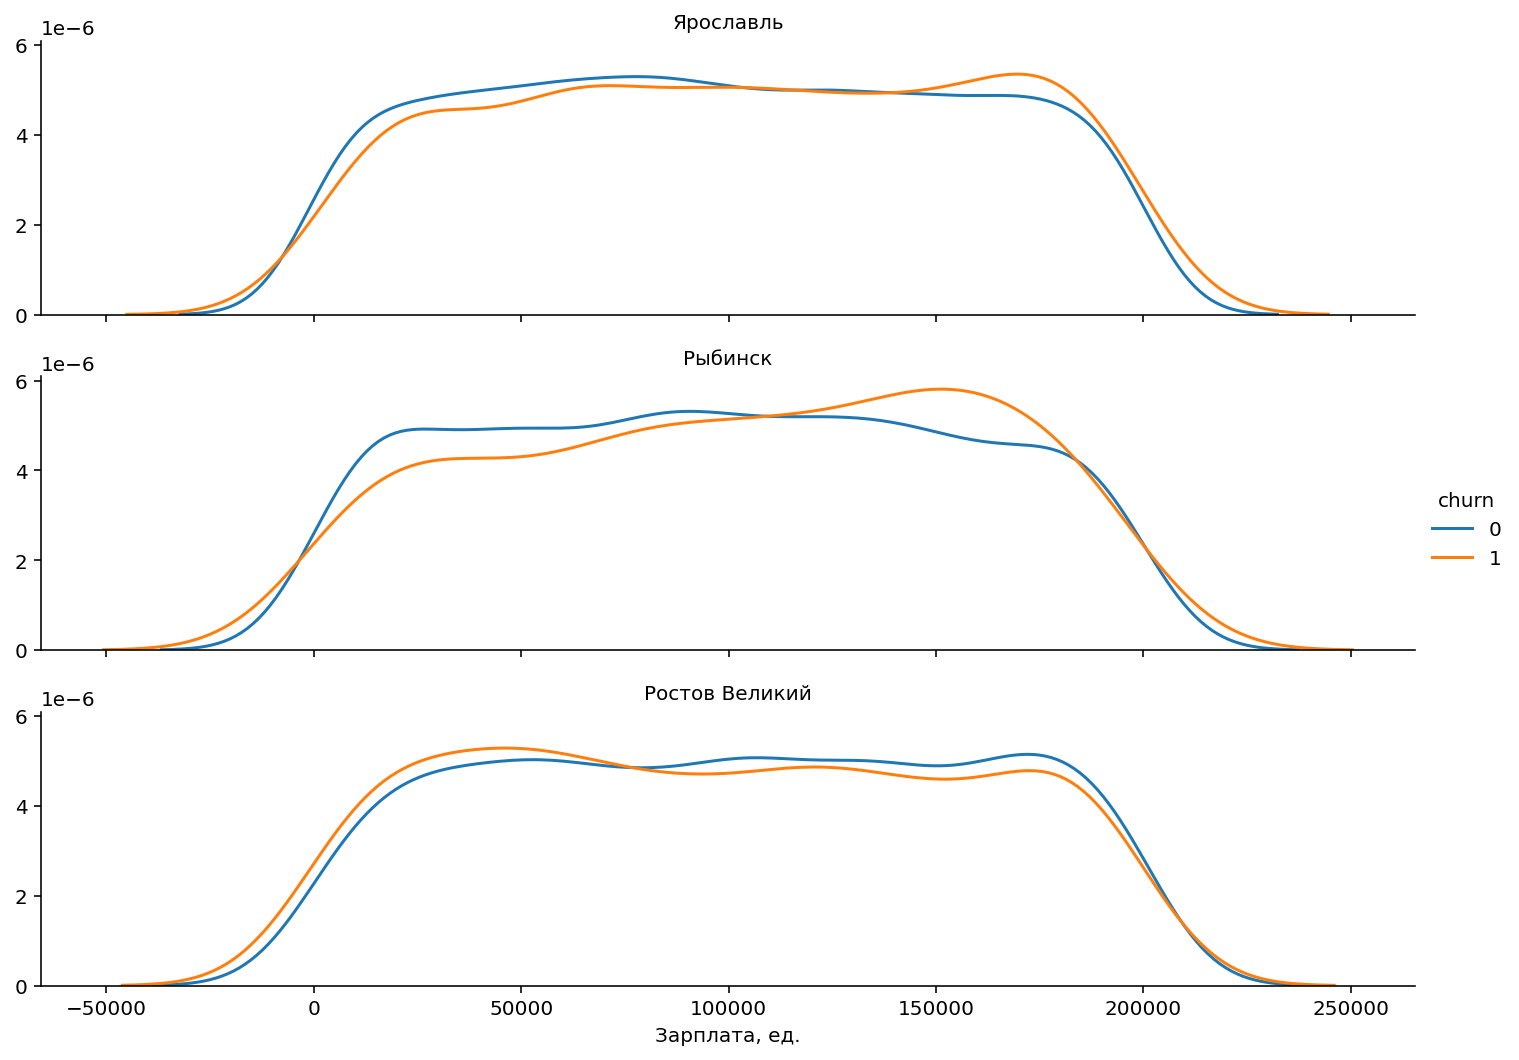

In [27]:
g = sns.FacetGrid(df, row='city', hue='churn',
                  height=2.5, aspect=4)
g.map(sns.kdeplot, 'estimated_salary')
g.set_xlabels('Зарплата, ед.')
g.set_titles(row_template='{row_name}')
g.add_legend()

Как и в целом по клиентам банка картина по городам не сильно отличается в зависимости от уровны оценочной зарплаты. Можно только отметить, что в Ярославле и Рыбинске клиенты с высоким уровнем дохода склонны отказываться от услуг банка, тогда как в Ростове Великом наоборот - клиенты с меньшим уровнем дохода уходят из банка.

Следующим шагом построим столбчатые диаграммы распределения по следующим признакам: количество объектов, количество используемых продуктов, наличие кредитной карты, активность, возрастная группа.

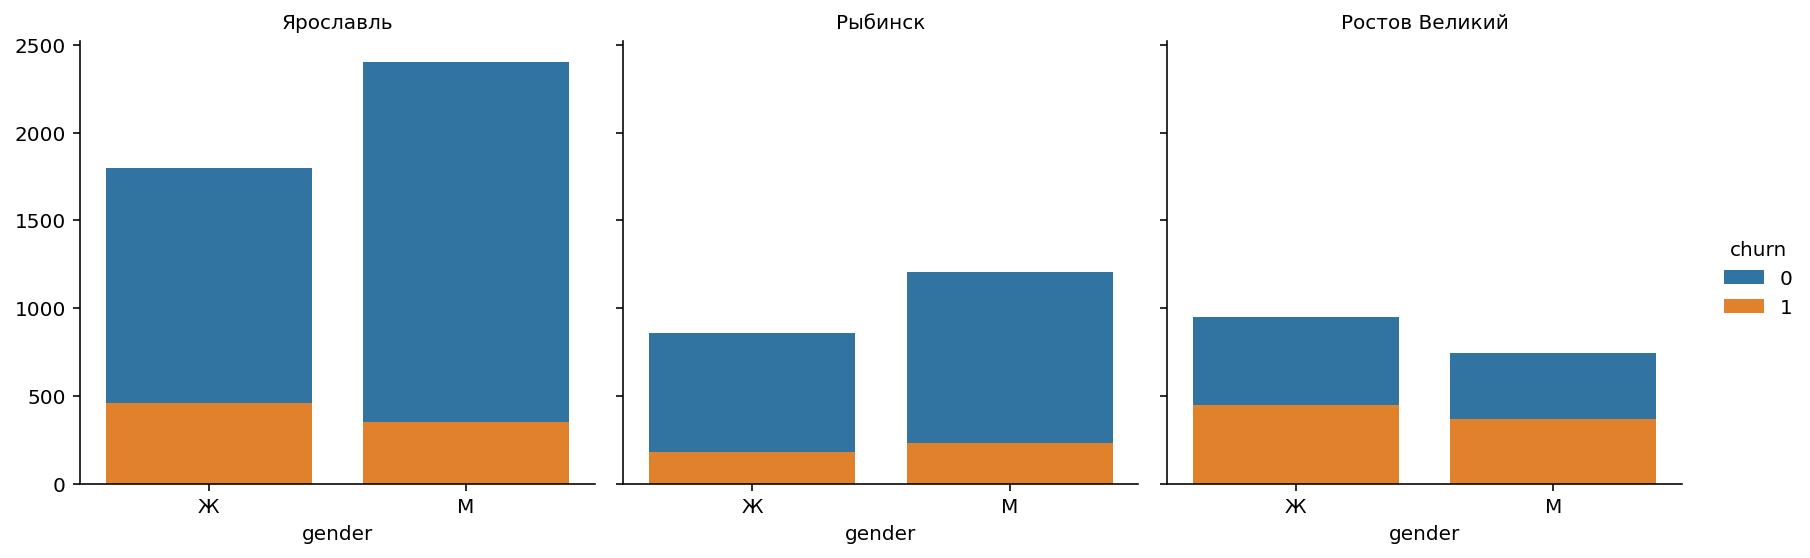

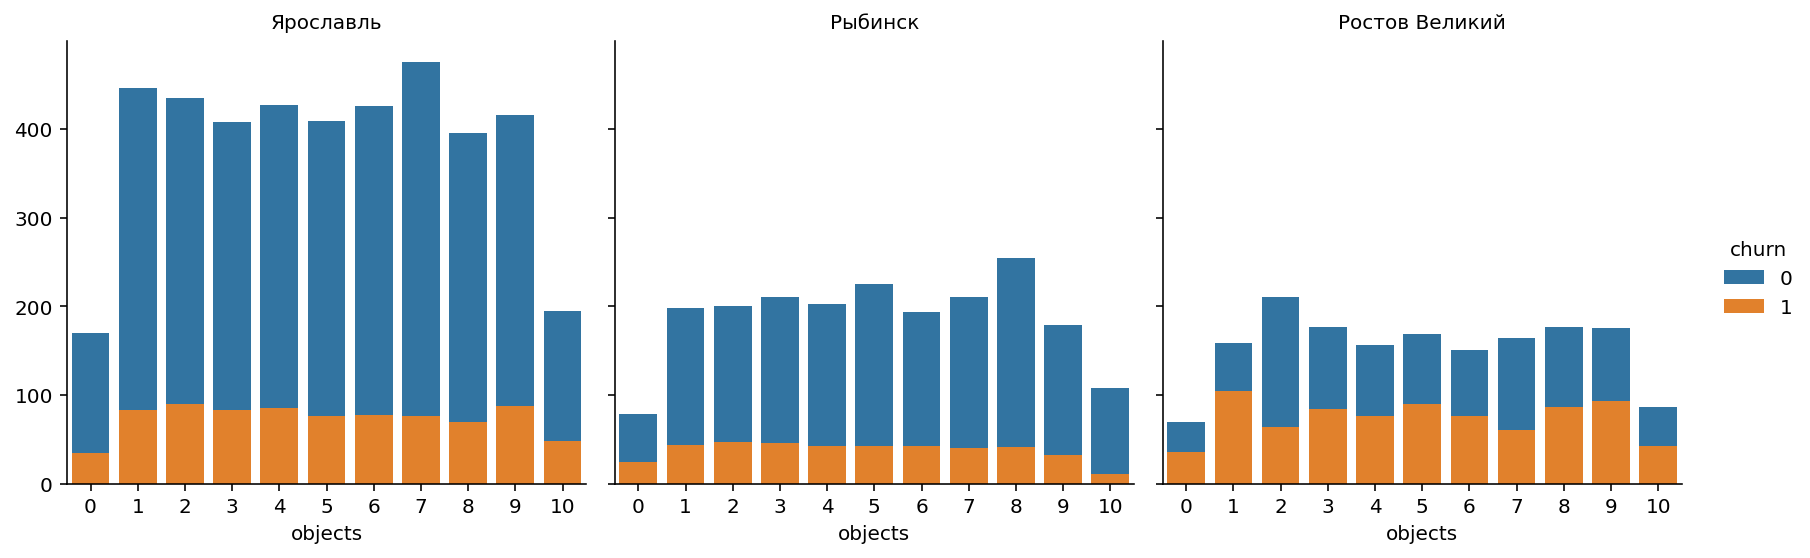

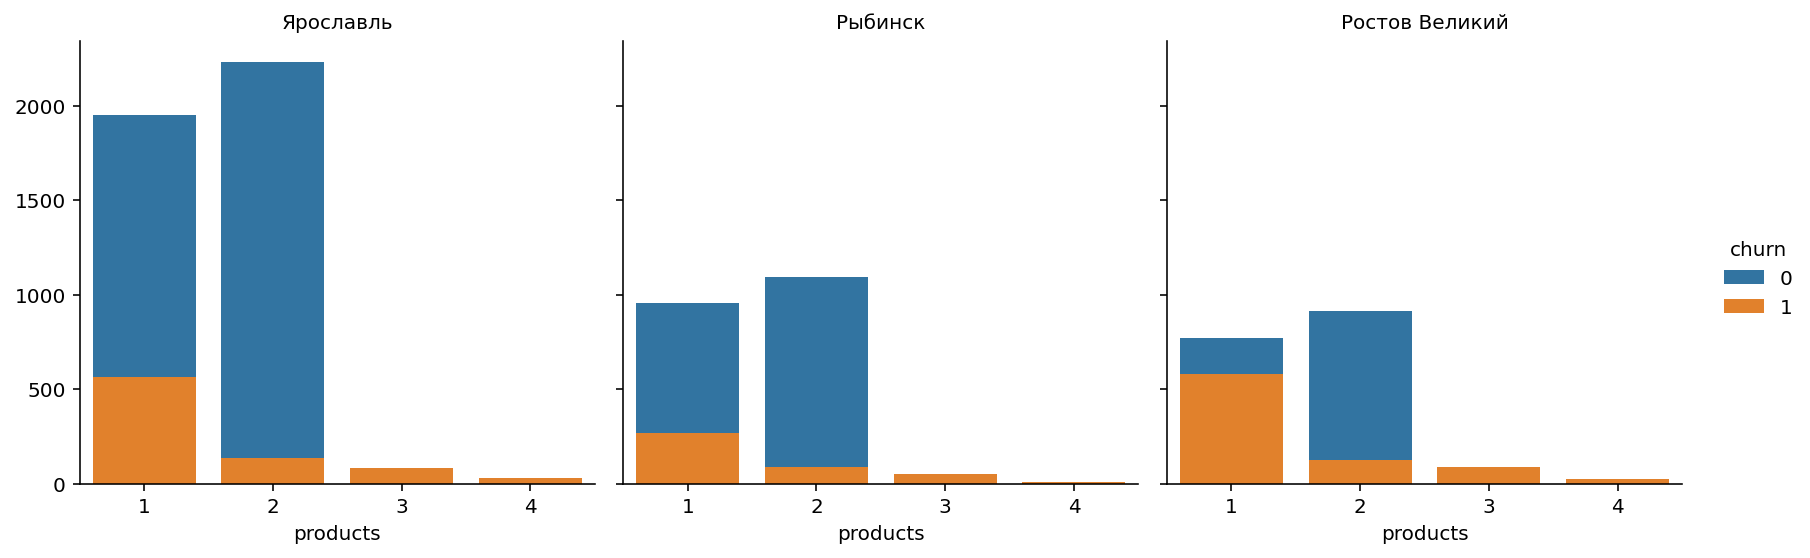

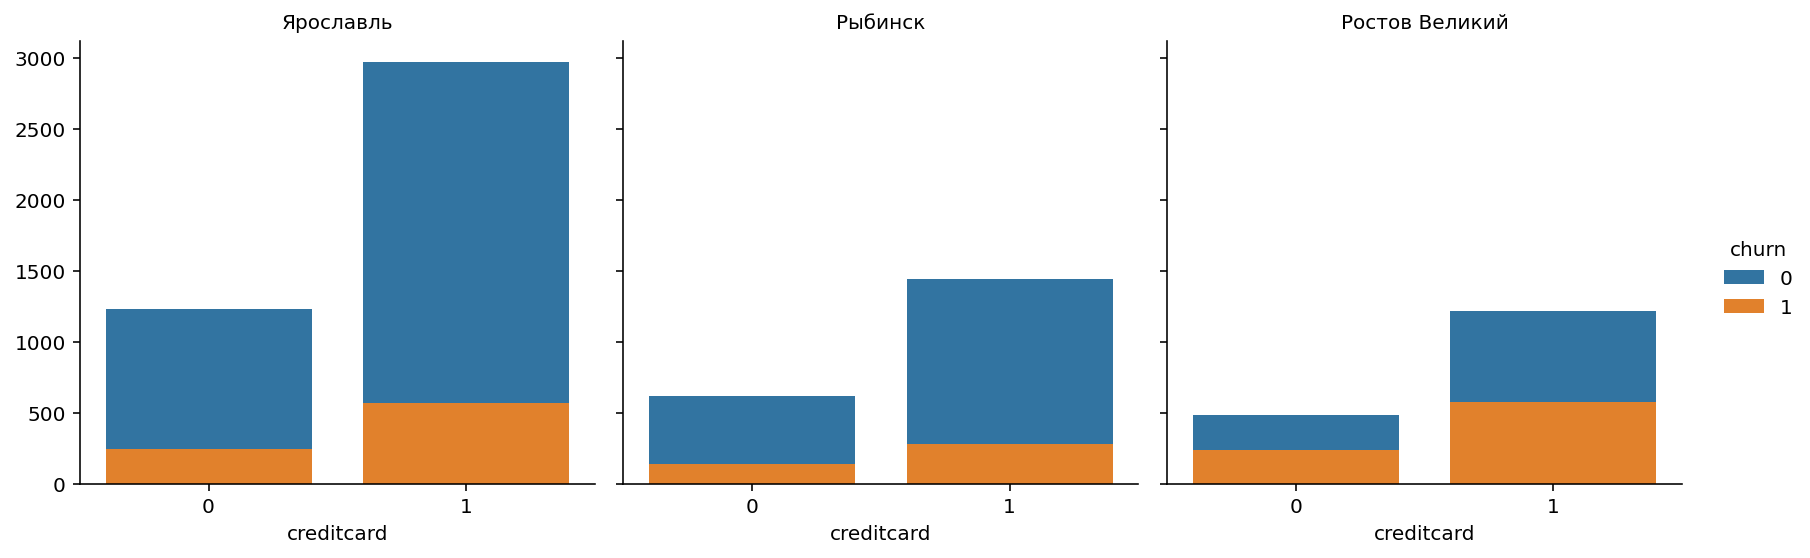

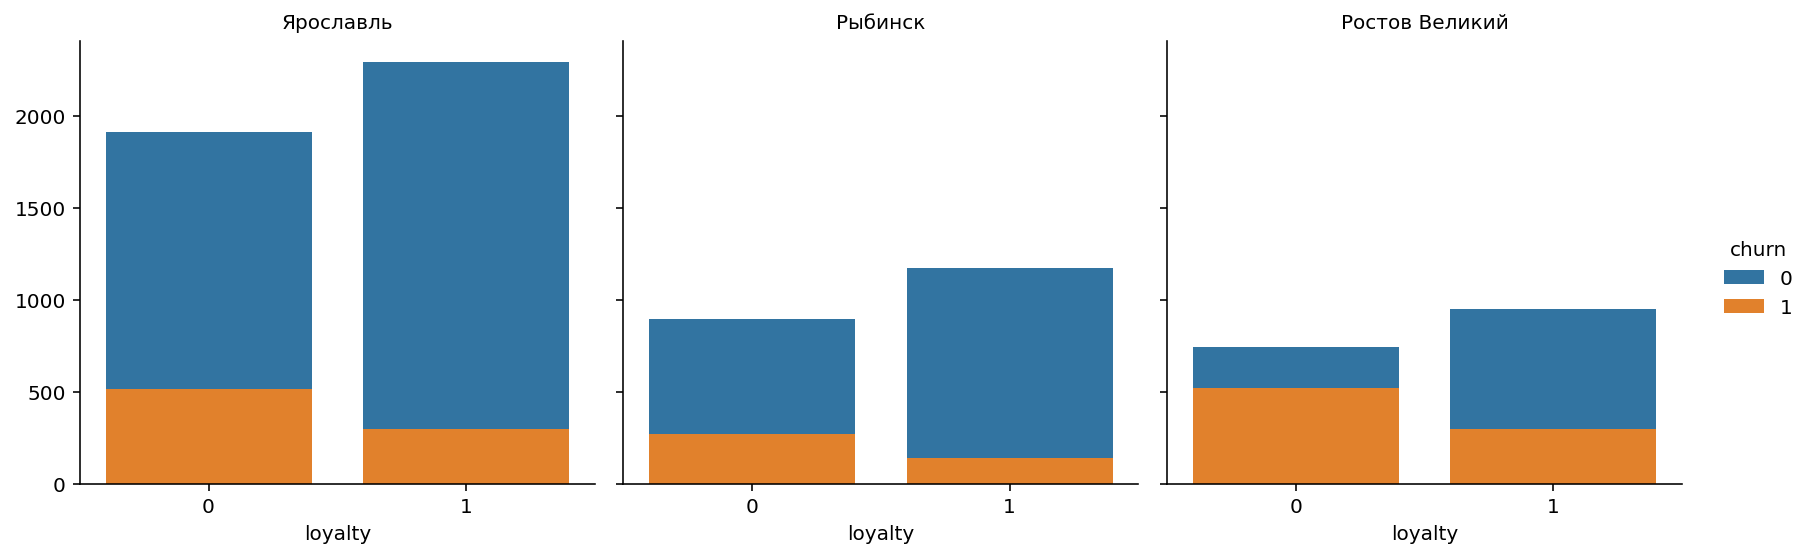

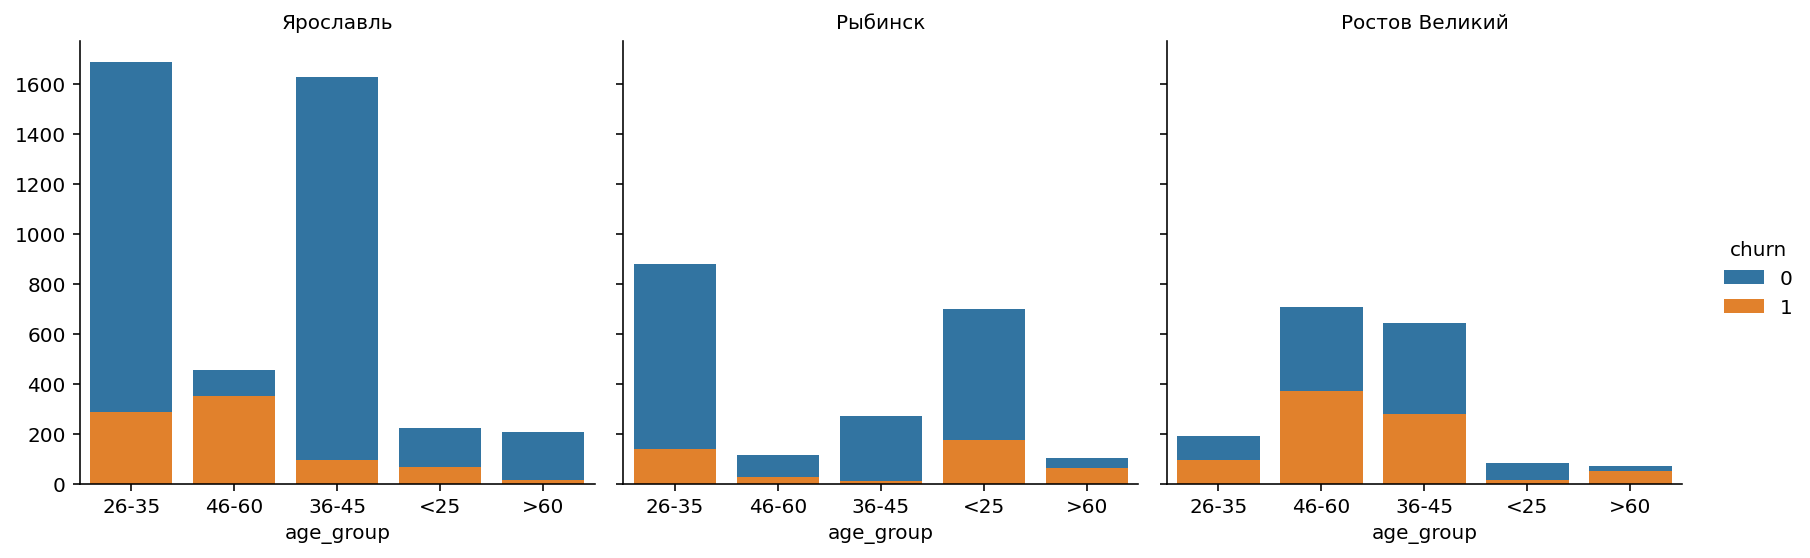

In [28]:
order = ['gender', 'objects', 'products', 'creditcard', 'loyalty', 'age_group']

for i in order:
    g = sns.FacetGrid(df, col='city', hue='churn',
                  height=4, aspect=1,)
    g.map(sns.countplot, i)
    g.set_titles(col_template='{col_name}')
    g.add_legend()
    g.tight_layout()

По результатам анализа сделаем следующие выводы:

 - по половому признаку распределение клиентов в Ярославле и Рыбинске одинаковое, преобладают мужчины над женщинами. Процент оттока среди мужчин меньше. В Ростове Великом клиентов женщин больше, доля оттока среди обеих групп примерно одинаковая.

 - по количеству объектов распределение в городах примерно одинаковое, однако **в Ростове Великом показател оттока явно выше чем в Ярославле и Рыбинске**.
 
 - по количеству используемых продуктов **лучше всего удерживаются клиенты, которые используют 2 продукта**, хуже клиенты использующие один продукт (особенно в Ростове Великом), и совсем **катастрофически плохо клиенты использующие 3 и 4 продукта**.
 
 - по наличию кредитной карты: **положительные показатели удержания показывают клиенты с кредитной картой банка в Ярославле и Рыбинске**, а в **Ростове Великом ситуация хуже - отношение ушедших в отток клиентов к оставшимся не меняется от наличия кредитной карты** и выше чем в других городах.
 
 - **более активно пользующиеся услугами банка клиенты демонстрируют меньше возможностей покинуть банк**, чем неактивные. Снова ситуация знакома - **в Ярославле и Рыбинске покахатели оттока ниже чем в Ростове Великом**.
 
 - очень интересная ситуация с распределением по возрастным группам: **в Ярославле и Рыбинске преобладает группа клиентов в возрасте от 26 до 35 лет**, однако в Ярославле также значительное число клиентов приходится на группу 36-45 лет, где показатель оттока невысокий. А вот в Рыбинске вторая по представительству группа это молодежь моложе 25 лет. Также отметим **большой уровень оттока клиентов в Ярославле в группе 46-60 лет**.
 
 - в Ростове Великом, как и во всех других случаях картина отличается. **Наибольшее представительство среди клиентов в группах 36-45 и 45-60 лет с высокими показателями оттока**. И очень небольшое представительство молодых людей в возрасте   26-35 лет, которые очень хорощо представленны в других городах. 

## 2.7 Анализ по количеству используемых продуктов

Проведем дополнительный анализ по количеству используемых продуктов банка для всех клиентов.

In [29]:
df['products'].value_counts()

1    5084
2    4590
3     266
4      60
Name: products, dtype: int64

Мы видим, что подавляющее число клиентов пользуется одним либо двумя продуктами. И клиенты предпочитают совсем не пользоваться 3 и 4 продуктами. 

Создадим сводную таблицу по количеству используемых продуктов и факту оттока с отношением ушедших в отток клиентов к общему числу. А также построим столбчатые диаграммы распределения.

products  churn  count   sum      %
1         1      0   3675  5084   72.0
2         1      1   1409  5084   28.0
0         2      0   4242  4590   92.0
3         2      1    348  4590    8.0
4         3      1    220   266   83.0
6         3      0     46   266   17.0
5         4      1     60    60  100.0

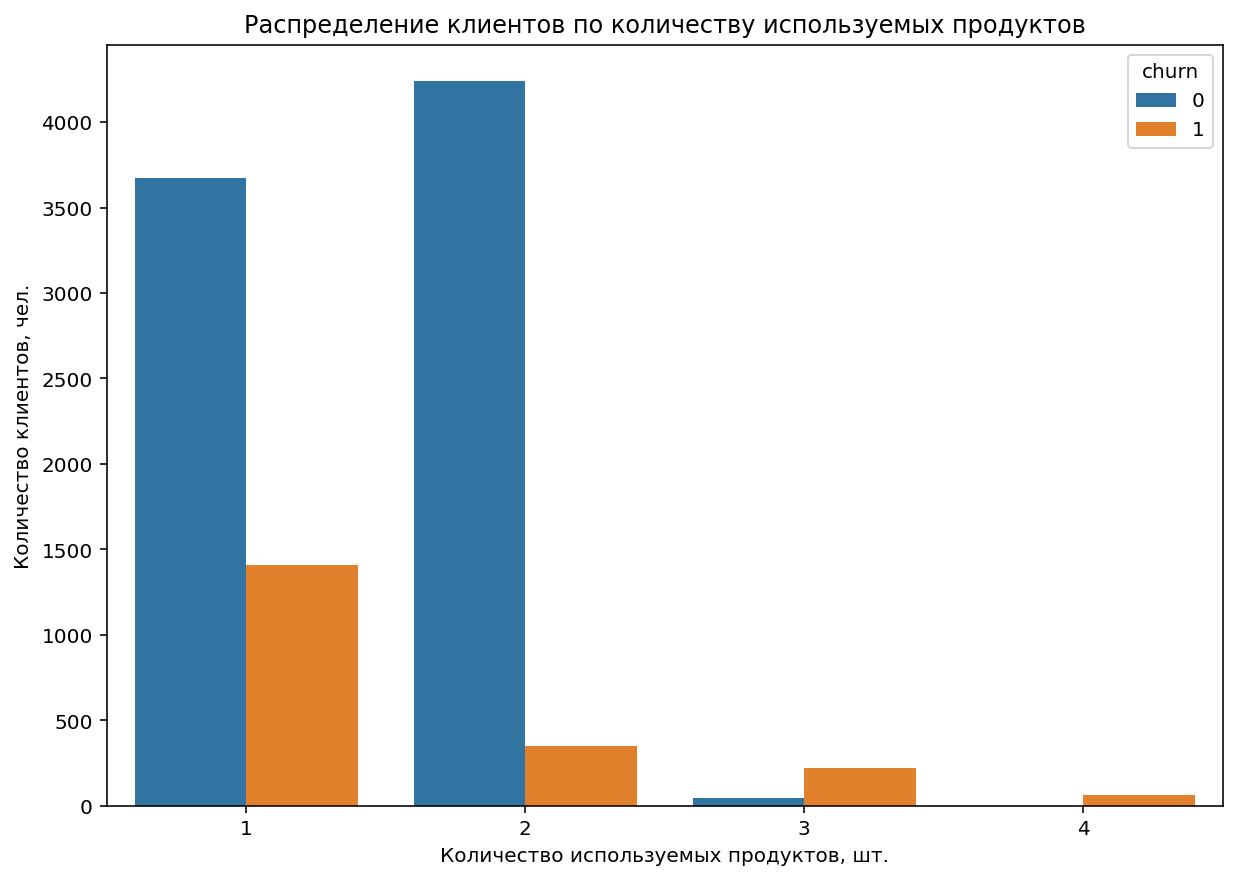

In [30]:
index_a = ['products', 'churn']
column_a = ['products', 'churn', 'count']
index_b = 'products'
column_b = ['products', 'sum']
merged = 'products'
sort = 'products'

#Создадим сводную таблицу
prcnt_func(index_a, index_b, column_a, column_b, merged, sort)

#Отобразим столюбчатые диаграммы распределения по количеству использкемых продуктов
plt.figure(figsize=(10, 7))
sns.countplot(x='products', hue='churn', data=df)
plt.title('Распределение клиентов по количеству используемых продуктов')
plt.xlabel('Количество используемых продуктов, шт.')
plt.ylabel('Количество клиентов, чел.')
plt.show()

На графике мы явно видим, что **среди пользователей одним продуктов наблюдается большой процент оттока клиентов - 28%** (с этим надо что-то делать). С другой стороны среди тех клиентов кто пользуется 2 продуктами есть доверие к банку и небольшой процент клиентов уходит в отток. Также явно просматривается, что **клиенты покидают банка после того как начинают использовать 3 и 4 продукта**. 

**Здесь стоит отдельно отметить, что мы не знаем какие продукты предлагает банк и какие из них более устраивают клиентов и способствуют их удержанию.**

# 3. Проверка гипотез

Проведем проверку гипотез.

## 3.1 Гипотеза №1

Первая гипотеза: проверить, есть ли статистически значимое различие в уровне доходов между клиентами, ушедшими в отток, и клиентами, которые продолжают пользоваться услугами банка.

Н0 - статистически значимых различий в средних выборок доходов между клиентами, ушедшими в отток, и клиентами, которые продолжают пользоваться услугами банка **нет**. 

Н1 - статистически значимые различия в средних выборок доходов между клиентами, ушедшими в отток, и клиентами, которые продолжают пользоваться услугами банка **есть**.

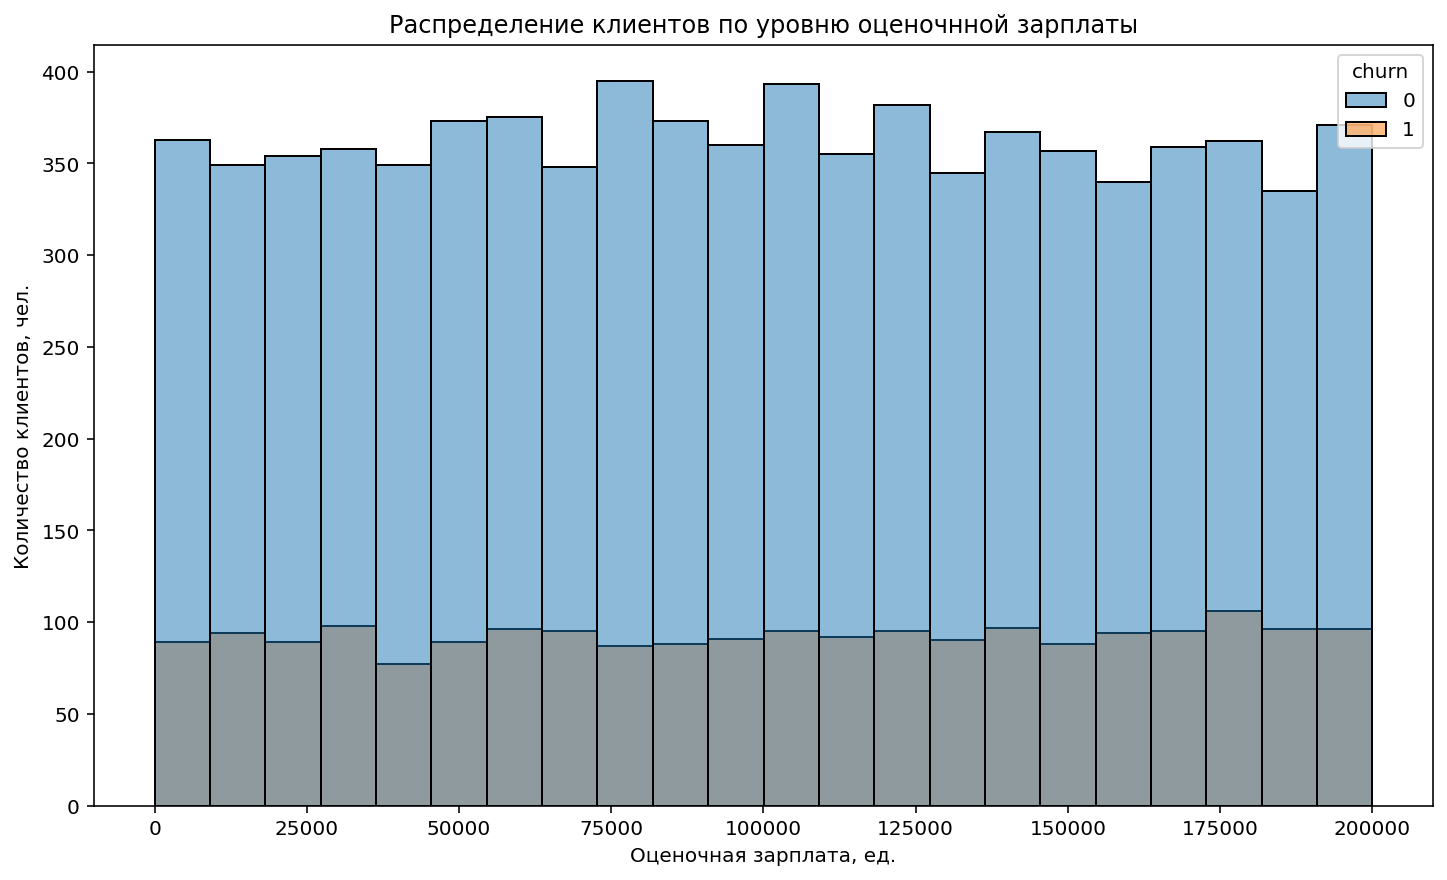

In [31]:
plt.figure(figsize=(12, 7))
sns.histplot(data=df, x='estimated_salary', hue='churn')
plt.title('Распределение клиентов по уровню оценочнной зарплаты')
plt.xlabel('Оценочная зарплата, ед.')
plt.ylabel('Количество клиентов, чел.')
plt.show()

Создадим две выборки - те, кто является клиентом банка, и те, кто покинул.

In [32]:
salary_churn_0 = df.query('churn == 0')['estimated_salary']
salary_churn_1= df.query('churn == 1')['estimated_salary']

Посмоторим на показатели по выборкам.

In [33]:
salary_churn_0.describe()

count      7963.000000
mean      99738.391772
std       57405.586966
min          90.070000
25%       50783.490000
50%       99645.040000
75%      148609.955000
max      199992.480000
Name: estimated_salary, dtype: float64

In [34]:
salary_churn_1.describe()

count      2037.000000
mean     101465.677531
std       57912.418071
min          11.580000
25%       51907.720000
50%      102460.840000
75%      152422.910000
max      199808.100000
Name: estimated_salary, dtype: float64

Мы видим, что показатели среднего и стандартного откленения по выборкам приблизительно равны.

Также проверим показатели дисперсии.

In [35]:
print('Дисперсия клиентов не ушедших в отток:', np.var(salary_churn_0, ddof=1))
print('Стандартное отклонение:', np.sqrt(np.var(salary_churn_0, ddof=1)))
print('')
print('Дисперсия клиентов ушедших в отток:', np.var(salary_churn_1, ddof=1))
print('Стандартное отклонение:', np.sqrt(np.var(salary_churn_1, ddof=1)))

Дисперсия клиентов не ушедших в отток: 3295401414.9183965
Стандартное отклонение: 57405.58696606452

Дисперсия клиентов ушедших в отток: 3353848166.8070116
Стандартное отклонение: 57912.418070799045


Показатели дисперсии для выборок близки между собой.

Проверять гипотезу будем c помощью t-критерия Стьюдента, т.к. наши выборки имеют равномерное распределение и обладают достаточной величиной данных. Применять будем метод `ttest_ind` библиотеки `scipy` для сравнения средних двух независимых выборок с различной дисперсией.

In [36]:
#За критический уровень статистической значимости alpha примем значение 0,05
alpha = 0.05
#Выполним t-тест
results_salary = st.ttest_ind(salary_churn_0, salary_churn_1, equal_var=False)
print('p-значение:', results_salary.pvalue)

if results_salary.pvalue<alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.228924613051458
Не получилось отвергнуть нулевую гипотезу


У нас не поличилось отвергнуть нулевую гипотезу, а значит **статистически значимых различий в уровне доходов между клиентами, ушедшими в отток, и клиентами, которые продолжают пользоваться услугами банка нет**.

Дополнительно проверим гипотезы непарметрическим тестом с помощью критерия Манна-Уитни. Результаты по всем трем гипотезам одинаковые для обоих тестов.

Н0 - статистически значимых различий в распределении уровня доходов между клиентами, ушедшими в отток, и клиентами, которые продолжают пользоваться услугами банка **нет**. 

Н1 - статистически значимые различия в распределении уровня доходов между клиентами, ушедшими в отток, и клиентами, которые продолжают пользоваться услугами банка **есть**.

In [37]:
#За критический уровень статистической значимости alpha примем значение 0,05
alpha = 0.05
#Выполним тест Манна-Уитни
results_salary = st.mannwhitneyu(salary_churn_0, salary_churn_1, alternative='two-sided')
print('p-значение:', results_salary.pvalue)

if results_salary.pvalue<alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.22705150930153783
Не получилось отвергнуть нулевую гипотезу


## 3.2 Гипотеза №2

Проверить, есть ли статистически значимое различие в количестве используемых продуктов банка между клиентами, ушедшими в отток, и клиентами, которые продолжают пользоваться услугами банка

Н0 - статистически значимых различий в средних выборок количества используемых продуктов банка между клиентами, ушедшими в отток, и клиентами, которые продолжают пользоваться услугами банка **нет**. 

Н1 - статистически значимые различия в средних выборок количества используемых продуктов банка между клиентами, ушедшими в отток, и клиентами, которые продолжают пользоваться услугами банка **есть**.

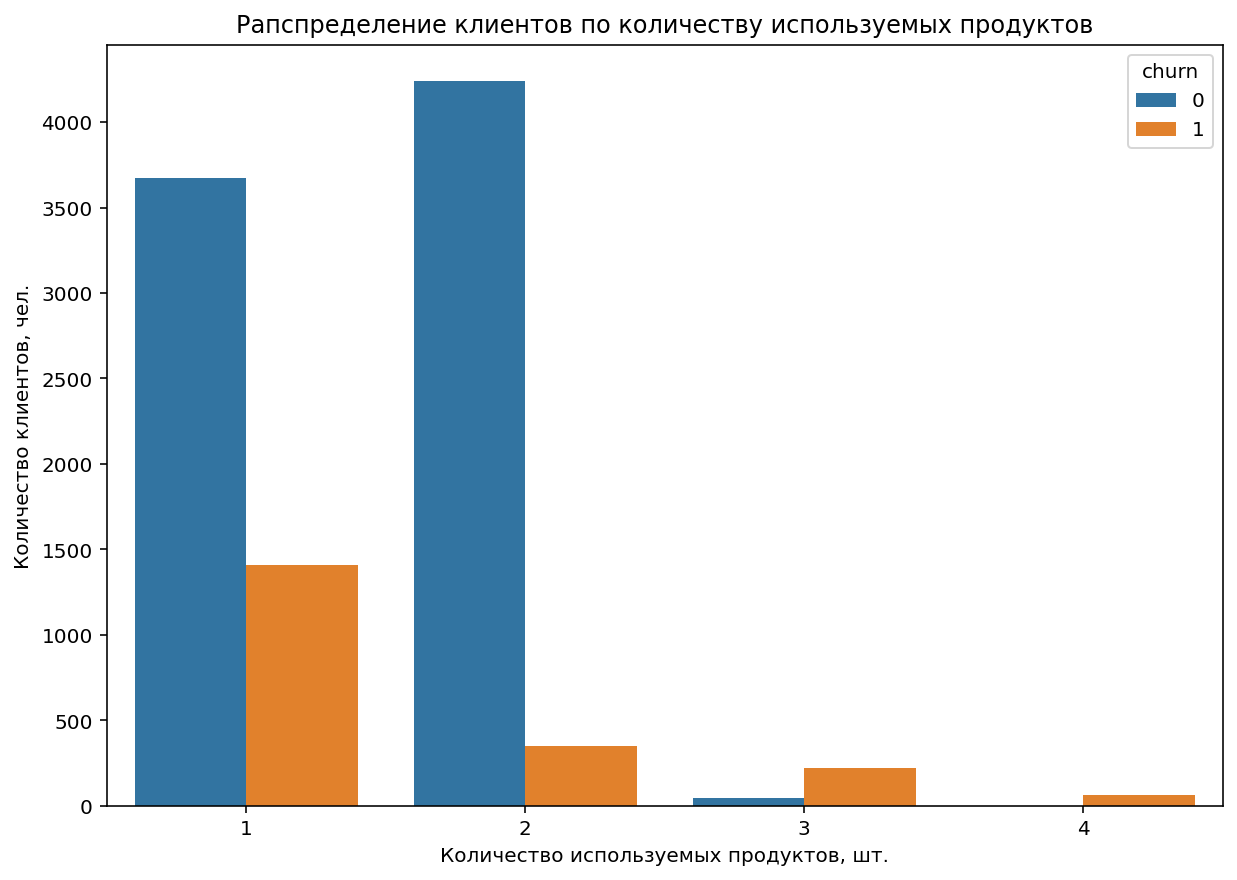

In [38]:
plt.figure(figsize=(10, 7))
sns.countplot(x='products', hue='churn', data=df)
plt.title('Рапспределение клиентов по количеству используемых продуктов')
plt.xlabel('Количество используемых продуктов, шт.')
plt.ylabel('Количество клиентов, чел.')
plt.show()

Создадим две выборки - те, кто является клиентом банка, и те, кто покинул.

In [39]:
prod_churn_0 = df.query('churn == 0')['products']
prod_churn_1= df.query('churn == 1')['products']

Посмоторим на показатели по выборкам.

In [40]:
prod_churn_0.describe()

count    7963.000000
mean        1.544267
std         0.509536
min         1.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         3.000000
Name: products, dtype: float64

In [41]:
prod_churn_1.describe()

count    2037.000000
mean        1.475209
std         0.801521
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         4.000000
Name: products, dtype: float64

Мы видим, что показатели среднего по выборкам близки (проверим не превышает ли это критическогоуровня статистической значимости), а стандартные отклонения различаются.

Также проверим показатели дисперсии.

In [42]:
print('Дисперсия клиентов не ушедших в отток:', np.var(prod_churn_0, ddof=1))
print('стандартное отклонение:', np.sqrt(np.var(prod_churn_0, ddof=1)))
print('')
print('Дисперсия клиентов ушедших в отток:', np.var(prod_churn_1, ddof=1))
print('стандартное отклонение:', np.sqrt(np.var(prod_churn_1, ddof=1)))

Дисперсия клиентов не ушедших в отток: 0.259626450555371
стандартное отклонение: 0.5095355243311019

Дисперсия клиентов ушедших в отток: 0.6424351848369025
стандартное отклонение: 0.8015205454864539


Показатели дисперсии выборок имеют значительные различия.

Проверять гипотезу будем c помощью t-критерия Стьюдента, т.к. наши выборки близки к нормальному распределению и обладают достаточной величиной данных. Применять будем метод `ttest_ind` библиотеки `scipy` для сравнения средних двух независимых выборок с различной дисперсией.

In [43]:
alpha = 0.05
results_prod = st.ttest_ind(prod_churn_0, prod_churn_1, equal_var=False)
print('p-значение:', results_prod.pvalue)

if results_prod.pvalue<alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.00021858494460549394
Отвергаем нулевую гипотезу


По результатам отвергаем нулевую гипотезу, а значит - **статистически значимые различия в количестве используемых продуктов банка между клиентами, ушедшими в отток, и клиентами, которые продолжают пользоваться услугами банка есть**.

Н0 - статистически значимых различий в распределении количества используемых продуктов банка между клиентами, ушедшими в отток, и клиентами, которые продолжают пользоваться услугами банка **нет**. 

Н1 - статистически значимые различия в распределении количества используемых продуктов банка между клиентами, ушедшими в отток, и клиентами, которые продолжают пользоваться услугами банка **есть**.

In [44]:
#За критический уровень статистической значимости alpha примем значение 0,05
alpha = 0.05
#Выполним тест Манна-Уитни
results_prod = st.mannwhitneyu(prod_churn_0, prod_churn_1, alternative='two-sided')
print('p-значение:', results_prod.pvalue)

if results_prod.pvalue<alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 5.275105212817194e-36
Отвергаем нулевую гипотезу


## 3.3 Гипотеза №3

Проверить, есть ли статистически значимое различие в балансе между клиентами, ушедшими в отток, и клиентами, которые продолжают пользоваться услугами банка

Н0 - статистически значимых различий в средних выборок баланса лицевого счета между клиентами, ушедшими в отток, и клиентами, которые продолжают пользоваться услугами банка **нет**.

Н1 - статистически значимые различия в средних выборок баланса лицевого счета между клиентами, ушедшими в отток, и клиентами, которые продолжают пользоваться услугами банка **есть**.

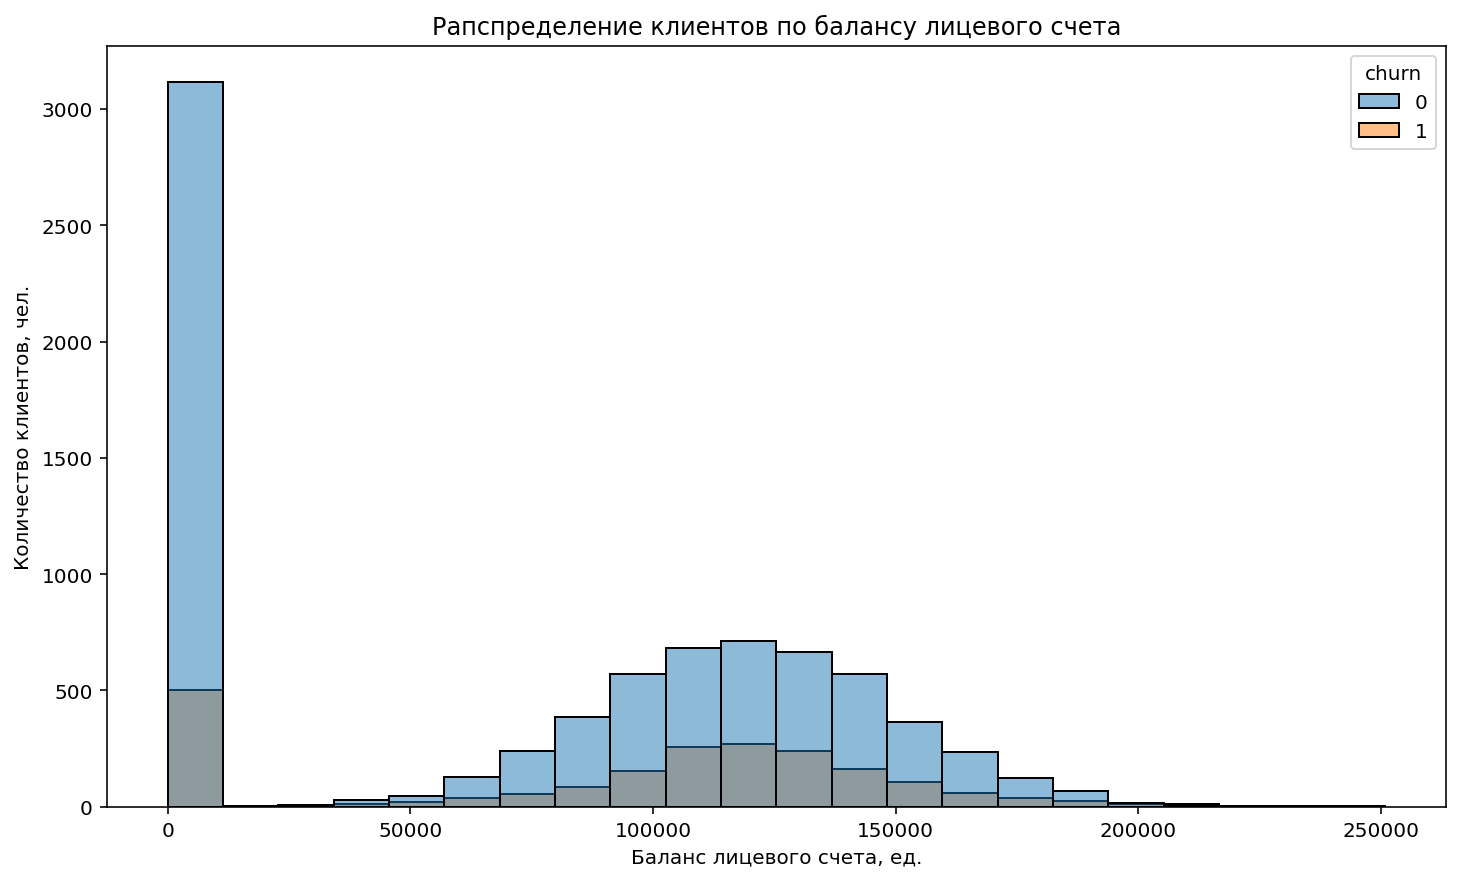

In [45]:
plt.figure(figsize=(12, 7))
sns.histplot(data=df, x='balance', hue='churn')
plt.title('Рапспределение клиентов по балансу лицевого счета')
plt.xlabel('Баланс лицевого счета, ед.')
plt.ylabel('Количество клиентов, чел.')
plt.show()

Создадим две выборки - те, кто является клиентом банка, и те, кто покинул.

In [46]:
balance_churn_0 = df.query('churn == 0')['balance']
balance_churn_1= df.query('churn == 1')['balance']

Посмоторим на показатели по выборкам.

In [47]:
balance_churn_0.describe()

count      7963.000000
mean      72745.296779
std       62848.040701
min           0.000000
25%           0.000000
50%       92072.680000
75%      126410.280000
max      221532.800000
Name: balance, dtype: float64

In [48]:
balance_churn_1.describe()

count      2037.000000
mean      91108.539337
std       58360.794816
min           0.000000
25%       38340.020000
50%      109349.290000
75%      131433.330000
max      250898.090000
Name: balance, dtype: float64

Мы видим, что и показатели среднего по выборкам, и стандартные отклонения различаются (проверим не превышает ли это критическогоуровня статистической значимости).

Также проверим показатели дисперсии.

In [49]:
print('Дисперсия клиентов не ушедших в отток:', np.var(balance_churn_0, ddof=1))
print('стандартное отклонение:', np.sqrt(np.var(balance_churn_0, ddof=1)))
print('')
print('Дисперсия клиентов ушедших в отток:', np.var(balance_churn_1, ddof=1))
print('стандартное отклонение:', np.sqrt(np.var(balance_churn_1, ddof=1)))

Дисперсия клиентов не ушедших в отток: 3949876219.90678
стандартное отклонение: 62848.04070061993

Дисперсия клиентов ушедших в отток: 3405982371.538363
стандартное отклонение: 58360.794815855304


Показатели дисперсии выборок имеют различия.

Проверять гипотезу будем c помощью t-критерия Стьюдента, т.к. наши выборки близки к нормальному распределению и обладают достаточной величиной данных. Применять будем метод `ttest_ind` библиотеки `scipy` для сравнения средних двух независимых выборок с различной дисперсией.

In [50]:
#За критический уровень статистической значимости alpha примем значение 0,05
alpha = 0.05
#Выполним t-тест
results_balance = st.ttest_ind(balance_churn_0, balance_churn_1, equal_var=False)
print('p-значение:', results_balance.pvalue)

if results_balance.pvalue<alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 6.318663518527793e-35
Отвергаем нулевую гипотезу


По результатам отвергаем нудевую гипотезу, а значит, что **статистически значимые различия в балансе лицевого счета между клиентами, ушедшими в отток, и клиентами, которые продолжают пользоваться услугами банка есть**.

Н0 - статистически значимых различий в распределении баланса лицевого счета между клиентами, ушедшими в отток, и клиентами, которые продолжают пользоваться услугами банка **нет**.

Н1 - статистически значимые различия в распределении баланса лицевого счета между клиентами, ушедшими в отток, и клиентами, которые продолжают пользоваться услугами банка **есть**.

In [51]:
#За критический уровень статистической значимости alpha примем значение 0,05
alpha = 0.05
#Выполним тест Манна-Уитни
results_balance = st.mannwhitneyu(balance_churn_0, balance_churn_1, alternative='two-sided')
print('p-значение:', results_balance.pvalue)

if results_balance.pvalue<alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 1.1158399379149222e-28
Отвергаем нулевую гипотезу


# Общие выводы

По итогам проведенного анализа мы можем составить характерные  портреты клиентов, определить оснеовные группы склонных к оттоку клиентов, а также дать предварительные  рекомендации по исправлению ситуации.

В нашем исследовании мы установили основной признак разделения клиентов - по городам. И именно по этому признаку мы нашли отличия в поведении клиентов.

Итак характерные портреты клиентов.

**Ярославль**

- самое большое количество клиентов;

- большая часть клиентов находятся в средневозрастной группе от 26-45 лет, наблюдается большое количество клиентов ушедших в отток в группе 46-60 лет;

- активно пользуются кредитной картой, процент оттока среди клиентов с кредитной картой банка и без приблизительно одинаковый.

- среди клиентов небольшое число тех, кто не владеет объектами в собственности, примерно равное распределение клиентов по количеству объектов в собственности и оттоку среди них от 1 до 9.

- по уровню оценочной зарплаты клиенты распределены равномерно, однако стоит особо отметить повышенный процент оттока клиентов с доходами выше 180 000 (это платежеспособные клиенты, для них стоит предложить продукт, позволющий привлечь клиентов);

- по балансу лицевого счета есть значительная доля клиентов с нулевым либо отсутствующим балансом, однако отток среди таких клиентов ниже, чем в среднем по группе.

- по кличеству используемых продуктов основная часть клиентов предпочитает пользоваться 1 либо 2 продуктами банка, процент отток среди тех кто пользуется 1 продуктом выше. Очень плохая ситуация с удержанием клиентов, которые пользуются 3-4 продуктами - среди них доля покинувших банк превышает тех, кто остался.
 
Итак, **основные активные клиенты банка это работающие люди в возрасте от 25 до 46 лет, имеющие в собственность какой-либо объект, пользующиеся 1 или 2 продуктами банка.** 

Особое стоит отметить, что среди активных клиентов много тех, у которых нет либо нулевой баланс лицевого счета, а значит **клиенты пользуются продуктами банка не зависисмо от баланса лицевого счета.**

**Преобладает число клиентов использующих 3 или 4 продукта банка и покинувших банк.** Стоит рассмотреть отдельно предлагаемые продукты и модернизировать их для повышения качества.

**Рыбинск**

- большая часть клиентов молодые люди моложе 35 лет, наблюдается хорошее доверии клиентов к банку в группе от 36 до 60 лет;

- активно пользуются кредитной картой, процент оттока среди клиентов с кредитной картой банка и без приблизительно одинаковый.

- среди клиентов небольшое число тех, кто не владеет объектами в собственности, примерно равное распределение клиентов по количеству объектов в собственности и оттоку среди них от 1 до 9.

- по уровню оценочной зарплаты клиенты распределены равномерно, однако стоит особо отметить повышенный процент оттока клиентов с доходами выше 180 000 (это платежеспособные клиенты, для них стоит предложить продукт, позволющий привлечь клиентов);

- по балансу лицевого счета есть значительная доля клиентов с нулевым либо отсутствующим балансом, однако отток среди таких клиентов ниже, чем в среднем по группе.

- по кличеству используемых продуктов основная часть клиентов предпочитает пользоваться 1 либо 2 продуктами банка, процент отток среди тех кто пользуется 1 продуктом выше. Очень плохая ситуация с удержанием клиентов, которые пользуются 3-4 продуктами - среди них доля покинувших банк превышает тех, кто остался.
 
Итак, **основные активные клиенты банка это молодые люди в возрасте моложе 35 лет, имеющие в собственность какой-либо объект, пользующиеся 1 или 2 продуктами банка.** 

Особое стоит отметить, что среди активных клиентов много тех, у которых нет либо нулевой баланс лицевого счета, а значит **клиенты пользуются продуктами банка не зависисмо от баланса лицевого счета.**

**Преобладает число клиентов использующих 3 или 4 продукта банка и покинувших банк.** Стоит рассмотреть отдельно предлагаемые продукты и модернизировать их для повышения качества.

**Ростов Великий**

Здесь явно прослеживается повышенный процент оттока клиентов по всем возрастным группам по сравнению с клиентами из других городов

- большая часть клиентов находятся в возрастной группе от 36 до 60 лет, процент ушедших в отток клиентов стремится к 50% практически по каждой группе;

- активно пользуются кредитной картой, процент оттока среди клиентов с кредитной картой банка и без приблизительно одинаковый.

- среди клиентов небольшое число тех, кто не владеет объектами в собственности, примерно равное распределение клиентов по количеству объектов в собственности и оттоку среди них от 1 до 9.

- по уровню оценочной зарплаты клиенты распределены равномерно, стоит отметить повышенный процент оттока клиентов с доходами ниже 75 000;

- по балансу лицевого счета есть явное отличие от клиентов других городов - отсутствуют клиенты с нулевым лоибо отсутствующим балансом лицевого счета, а процент оттока клиентов с балансом от 100 000 до 150 000 превышает процент удержанных клиентов. Здесь стоит обратить внимание на предлагаемые продукты и их распределение по клиентам (у нас эта инвормация отсутствует);

- по кличеству используемых продуктов основная часть клиентов предпочитает пользоваться 1 либо 2 продуктами банка, процент отток среди тех кто пользуется 1 продуктом выше. Очень плохая ситуация с удержанием клиентов, которые пользуются 3-4 продуктами - среди них доля покинувших банк превышает тех, кто остался.
 
Итак, **наибольшее количество клиентов ушедших в отток наблюдается именно в Ростове Великом**.

**Основные активные клиенты банка это работающие люди в возрасте от 36 до 60 лет, имеющие в собственность какой-либо объект, пользующиеся 1 или 2 продуктами банка, с ненулевым балансом лицевого счета.** 

Особое стоит отметить отсутствие клиентов с нулевым балансом лицевого счета. Если по другим городам мы видим положительную динамику предлагаемых продуктов для клиентов без либо нулевым лицевым счетом и хорошее удержание, то в Ростове Великом такие продукты отсутствуют и клиентам приходится пользоваться только теми продуктами которые предполагают наличие лицевого счета. При этом мы наблюдаем плохой коэффициент удержания клиентов.

**Преобладает число клиентов использующих 3 или 4 продукта банка и покинувших банк.** Стоит рассмотреть отдельно предлагаемые продукты и модернизировать их для повышения качества.

**Главный вывод нашего исследования - это повышенный процент оттока клиентов в Ростове Великом по сравнению с Ярославлем и Рыбинском**.

Это обусловленно **различием в предлагаемых продуктах в разных городах**. В Ростове Великом одна продуктовая линейка, в Ярославле и Рыбинске другая.

Также особо отмечаем, что продуктовая линейка банка для Ярослвля и Рыбинска позволяет привлекать более молодых клиентов, а также тех кто не имеет лицевого счета в банке. (это позволяет охватить большее количество клиентов).

Отдельно добавим, что клиенты очень неохотно пользуются болле чем двумя продукатами банка и **большая часть тех, кто использует 3 или 4 продукта покидают банк**.

Рекомендации:

- **привести продуктовую линейку банка к единому виду во всех городах**;

- **оптимизировать прелагаемые продукты: определить популярные продукты, объединить некоторые продукты в один, отказаться от непопулярных (определение эфективность и качества предлагаемых продуктов не входит в это исследование)**.

Среди рекомендуемых вариантов продуктов:

- страховые, брокерские, инвестиционные продукты с использованием онлайн приложения или мобильного приложения с возможностью не открывать лицевой счет;

- услуги по переводам, оплате счетов для физических лиц и малого бизнеса.

- услуги для самозанятых.